<a href="https://colab.research.google.com/github/gabbie-datascience/china-zhong_guo-_air_quality/blob/main/zhong_guo_air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

## basic imports

In [ ]:
import pandas, numpy, scipy, warnings
warnings.filterwarnings('ignore')

In [ ]:
pandas.__version__, numpy.__version__, scipy.__version__


('2.2.2', '1.26.4', '1.13.1')

## reading data

In [ ]:
# with pandas

In [ ]:
china_mainland_air_quality=pandas.read_csv("/content/zhong_guo_airquality_data.csv")
china_mainland_air_quality.head()


,Year,Province,PM2.5,PM10,NO2,CO,SO2,O3,VOC,Temperature,Humidity,WindSpeed,Pressure,Rainfall
0,1970,Anhui,10.449388,50.026965,32.113803,0.418691,0.318115,25.646950,81.603935,23.399046,61.461850,4.535317,1015.707758,6.611535
1,1971,Anhui,245.705203,24.973145,28.197655,0.441584,0.167921,40.780025,NaN,16.800260,64.580433,3.832636,1018.977899,8.121224
2,1972,Anhui,36.103563,65.294675,35.712593,4.427406,0.248291,30.733043,47.690482,25.622167,77.634743,5.237073,1009.756114,-1.024808
3,1973,Anhui,20.120543,47.510205,50.125507,0.289926,1.078559,57.529314,54.078766,23.858084,NaN,3.594450,1014.450130,5.099511
4,1974,Anhui,45.649463,41.695676,46.223206,0.615956,NaN,16.535658,60.722126,28.237701,74.654865,5.914123,1009.834092,7.310695


In [ ]:
china_mainland_air_quality.tail()


,Year,Province,PM2.5,PM10,NO2,CO,SO2,O3,VOC,Temperature,Humidity,WindSpeed,Pressure,Rainfall
1619,2021,Zhejiang,22.335643,48.547252,53.875279,0.553687,0.080560,37.193037,59.337022,21.484942,57.881456,4.894365,1013.838766,6.513166
1620,2022,Zhejiang,50.428945,59.085594,43.677620,0.390423,0.284959,32.698770,NaN,28.254568,47.988604,4.771712,1009.046282,5.479419
1621,2023,Zhejiang,21.663782,42.184449,43.411551,0.631146,0.277343,46.693335,37.461702,24.815789,68.486529,5.710300,1006.178050,2.332199
1622,2024,Zhejiang,22.770688,81.117293,45.175085,0.374516,0.165326,28.986965,48.306410,22.432103,63.485263,5.205246,1012.676623,3.563640
1623,2025,Zhejiang,10.067102,44.699894,32.312103,0.464535,0.338619,121.015648,73.598176,31.629282,65.452313,5.528969,1017.613145,1.039534


In [ ]:
china_mainland_air_quality.shape


(1624, 14)

# creating a copy

In [ ]:
china_mainland_air_quality_copy=china_mainland_air_quality.copy()

# data analysis - knowing the data

## basic data analysis

In [ ]:
# renaming column CO ---> CO2
china_mainland_air_quality_copy.rename(columns={'CO':'CO2'}, inplace=True)


In [ ]:
# data analysis - types of dataset, NaN values, descriptive statistics

In [ ]:
china_mainland_air_quality_copy.dtypes


,0
Year,int64
Province,object
PM2.5,float64
PM10,float64
NO2,float64
CO2,float64
SO2,float64
O3,float64
VOC,float64
Temperature,float64


In [ ]:
china_mainland_air_quality_copy.isnull().sum()


,0
Year,0
Province,0
PM2.5,76
PM10,81
NO2,65
CO2,83
SO2,85
O3,83
VOC,79
Temperature,71


In [ ]:
china_mainland_air_quality_copy.describe()


,Year,PM2.5,PM10,NO2,CO2,SO2,O3,VOC,Temperature,Humidity,WindSpeed,Pressure,Rainfall
count,1624.000000,1548.000000,1543.000000,1559.000000,1541.000000,1539.000000,1541.000000,1545.000000,1553.000000,1547.000000,1549.000000,1542.000000,1544.000000
mean,1997.500000,37.615011,62.006694,47.414997,0.648315,0.289531,45.871309,66.226576,22.373701,69.968336,5.012613,1013.016329,4.964879
std,16.168209,40.352533,51.298166,35.509431,0.700421,0.438853,27.059013,39.878329,4.977132,14.964570,0.986681,4.982475,2.968411
min,1970.000000,-6.166909,-3.856744,7.500752,-0.164260,-0.146481,7.187807,-12.544154,5.730728,18.487965,1.763100,996.934573,-4.941772
25%,1983.750000,23.054877,41.186729,33.214956,0.373794,0.136453,33.690371,46.389315,19.081745,60.208514,4.314415,1009.587516,3.049279
50%,1997.500000,30.021243,50.940605,40.652799,0.513552,0.204164,40.526135,60.603486,22.310470,69.958677,4.998337,1013.029296,5.056636
75%,2011.250000,37.629212,62.329035,47.963225,0.664500,0.279143,48.329109,74.545689,25.668478,79.978125,5.684639,1016.543070,6.891314
max,2025.000000,299.866788,348.951834,249.098410,4.764148,2.998199,197.270405,293.428771,43.010129,123.230236,8.111168,1029.422054,14.549204


### basic data tratament

In [ ]:
# data tratament - types of dataset, NaN values, descriptive statistics - this is the most recommended

### pandas.to_datetime

In [ ]:
# this is for if you have a year, month and or day
china_mainland_air_quality_copy['Year']=pandas.to_datetime(china_mainland_air_quality_copy['Year'], format='%Y')


In [ ]:
china_mainland_air_quality_copy.dtypes.head(1)


,0
Year,datetime64[ns]


### .fillna()

In [ ]:
# NaN values tratament

In [ ]:
for column in china_mainland_air_quality_copy.columns:
    if china_mainland_air_quality_copy[column].isnull().any():
        china_mainland_air_quality_copy[column].fillna(china_mainland_air_quality_copy[column].mean(), inplace=True)


In [ ]:
china_mainland_air_quality_copy.isna().sum()


,0
Year,0
Province,0
PM2.5,0
PM10,0
NO2,0
CO2,0
SO2,0
O3,0
VOC,0
Temperature,0


# provinces

In [ ]:
china_mainland_air_quality_copy['Province'].unique()


array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hubei', 'Hunan', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan',
       'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang'], dtype=object)

In [ ]:
# important provinces

In [ ]:
beijing_province=china_mainland_air_quality_copy[china_mainland_air_quality_copy['Province']=='Beijing']
beijing_province.head()


,Year,Province,PM2.5,PM10,NO2,CO2,SO2,O3,VOC,Temperature,Humidity,WindSpeed,Pressure,Rainfall
56,1970-01-01,Beijing,37.615011,55.690942,23.894211,0.788978,0.230301,35.396936,14.436702,22.373701,102.252489,4.696344,1014.433297,4.168587
57,1971-01-01,Beijing,24.599192,264.801096,43.965751,0.373036,0.206346,48.996658,65.629307,15.847694,39.662927,4.962254,1015.048227,7.375719
58,1972-01-01,Beijing,47.527728,66.855935,46.165827,0.392413,0.344344,29.170122,81.900061,31.423366,90.997882,4.610862,1004.777423,2.753887
59,1973-01-01,Beijing,30.459437,45.816742,42.410414,0.137426,0.279370,149.940025,40.585163,16.905898,45.502998,4.510002,1018.279663,5.709160
60,1974-01-01,Beijing,20.216052,325.342957,38.525824,0.615021,0.202820,40.685170,38.998621,24.047158,77.398946,5.211533,1013.049662,4.571749


In [ ]:
shanghai_province=china_mainland_air_quality_copy[china_mainland_air_quality_copy['Province']=='Shanghai']
shanghai_province.head()


,Year,Province,PM2.5,PM10,NO2,CO2,SO2,O3,VOC,Temperature,Humidity,WindSpeed,Pressure,Rainfall
1176,1970-01-01,Shanghai,38.795945,35.753893,33.362153,0.264247,0.091534,123.212111,67.241435,16.819956,69.122488,5.391481,1008.780734,9.855971
1177,1971-01-01,Shanghai,29.901230,52.073444,41.951029,0.648315,2.332915,24.225719,86.261966,27.819767,62.626180,5.012613,1012.316279,0.348093
1178,1972-01-01,Shanghai,23.660226,46.231046,46.049593,0.242374,0.150192,31.924309,57.754428,31.235145,34.954791,4.966702,1015.560091,5.291533
1179,1973-01-01,Shanghai,46.019319,57.216269,42.387880,0.275511,0.314250,29.832816,66.019832,15.706384,96.418196,5.105410,1018.967059,7.491658
1180,1974-01-01,Shanghai,31.329993,61.526059,39.707201,-0.006432,0.094449,119.158845,75.530153,21.044067,58.055340,5.250504,1017.741980,4.593405


In [ ]:
guangdong_province=china_mainland_air_quality_copy[china_mainland_air_quality_copy['Province']=='Guangdong']
guangdong_province.head()


,Year,Province,PM2.5,PM10,NO2,CO2,SO2,O3,VOC,Temperature,Humidity,WindSpeed,Pressure,Rainfall
280,1970-01-01,Guangdong,17.619458,54.026116,40.915808,0.574420,0.167830,30.777919,37.823203,24.498555,76.608276,6.051255,1008.696906,2.251226
281,1971-01-01,Guangdong,14.600081,46.523316,45.365220,0.674215,0.199141,46.398928,62.835585,21.407551,57.346352,6.867965,1004.939525,3.050230
282,1972-01-01,Guangdong,27.050954,31.939619,30.280598,0.242271,0.250244,37.930419,101.018020,24.281199,72.382101,4.716248,1017.722428,-0.955598
283,1973-01-01,Guangdong,39.718964,41.514235,19.163777,0.246195,0.322142,41.369038,104.156335,18.093204,68.343882,4.787554,1004.739768,4.391227
284,1974-01-01,Guangdong,31.404873,45.461310,54.734391,0.370898,0.183395,24.021865,42.565350,12.228934,68.853881,5.358576,1015.892706,5.056407


# outliers

## outliers analysis(there was no unusual event - there should be no outliers)

In [ ]:
# imports

In [ ]:
import matplotlib.pyplot
import seaborn


In [ ]:
categories = ['PM2.5', 'PM10', 'NO2', 'CO2', 'SO2', 'O3', 'VOC', 'Temperature', 'Humidity', 'WindSpeed', 'Pressure', 'Rainfall']


In [ ]:
# beijing province

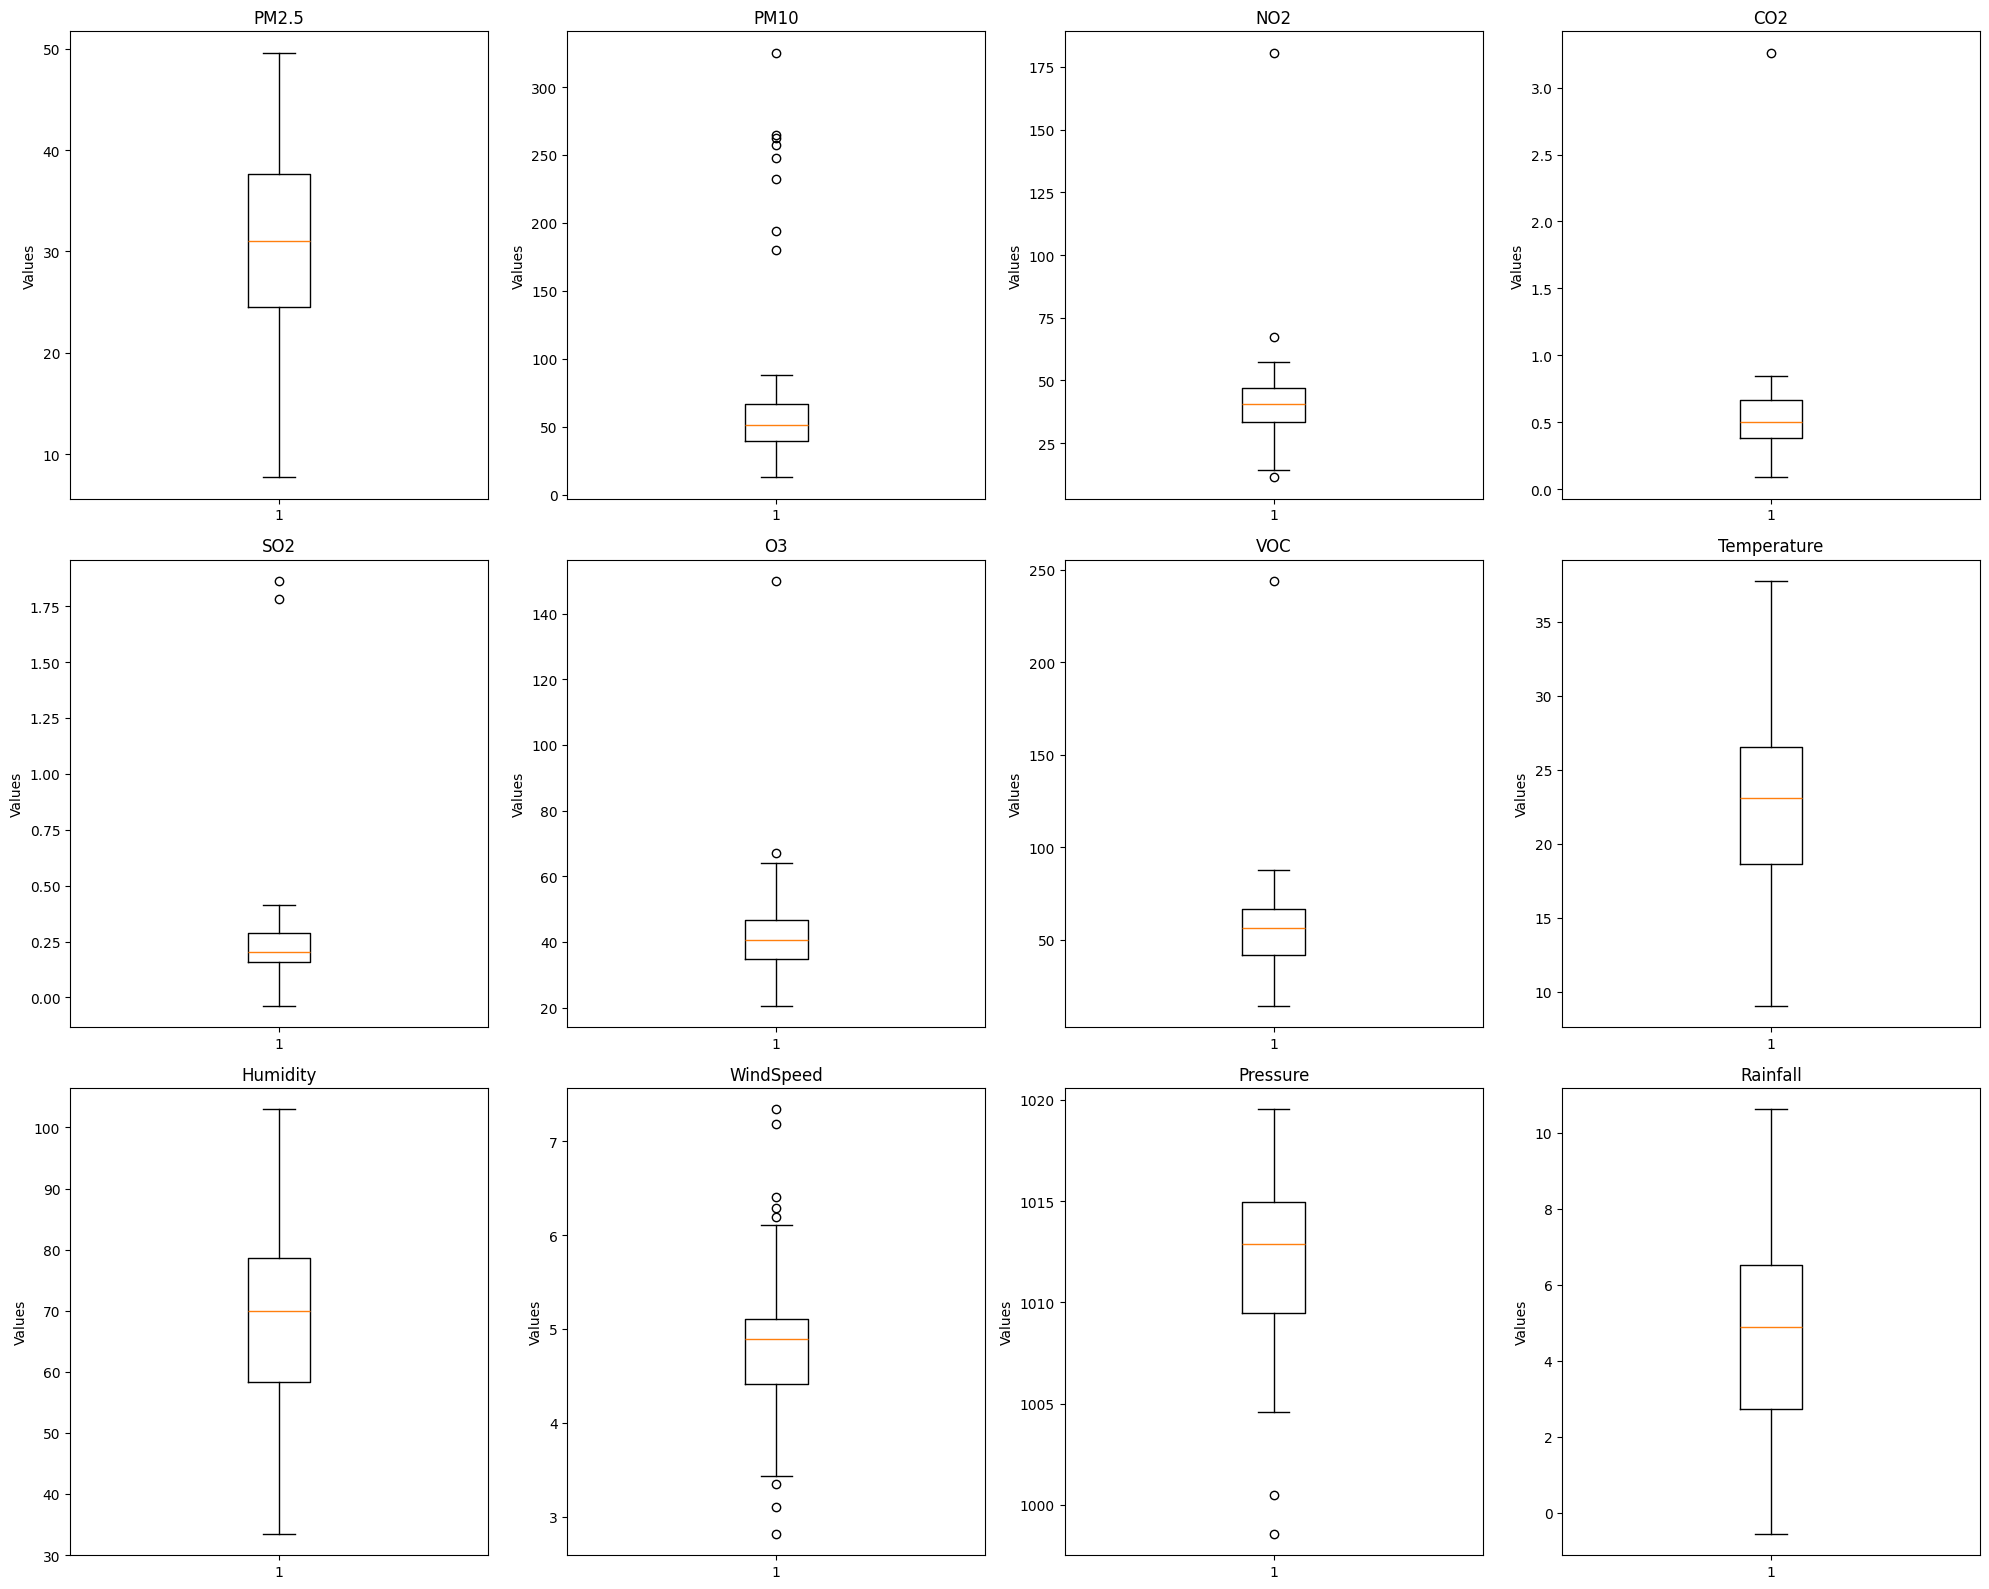

In [ ]:
fig, axes=matplotlib.pyplot.subplots(3, 4, figsize=(20, 16))
axes=axes.flatten()

for i, category in enumerate(categories):
    axes[i].boxplot(beijing_province[category])
    axes[i].set_title(category)
    axes[i].set_ylabel('Values')

for j in range(len(categories), len(axes)):
  fig.delaxes(axes[j])

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


In [ ]:
# shanghai province

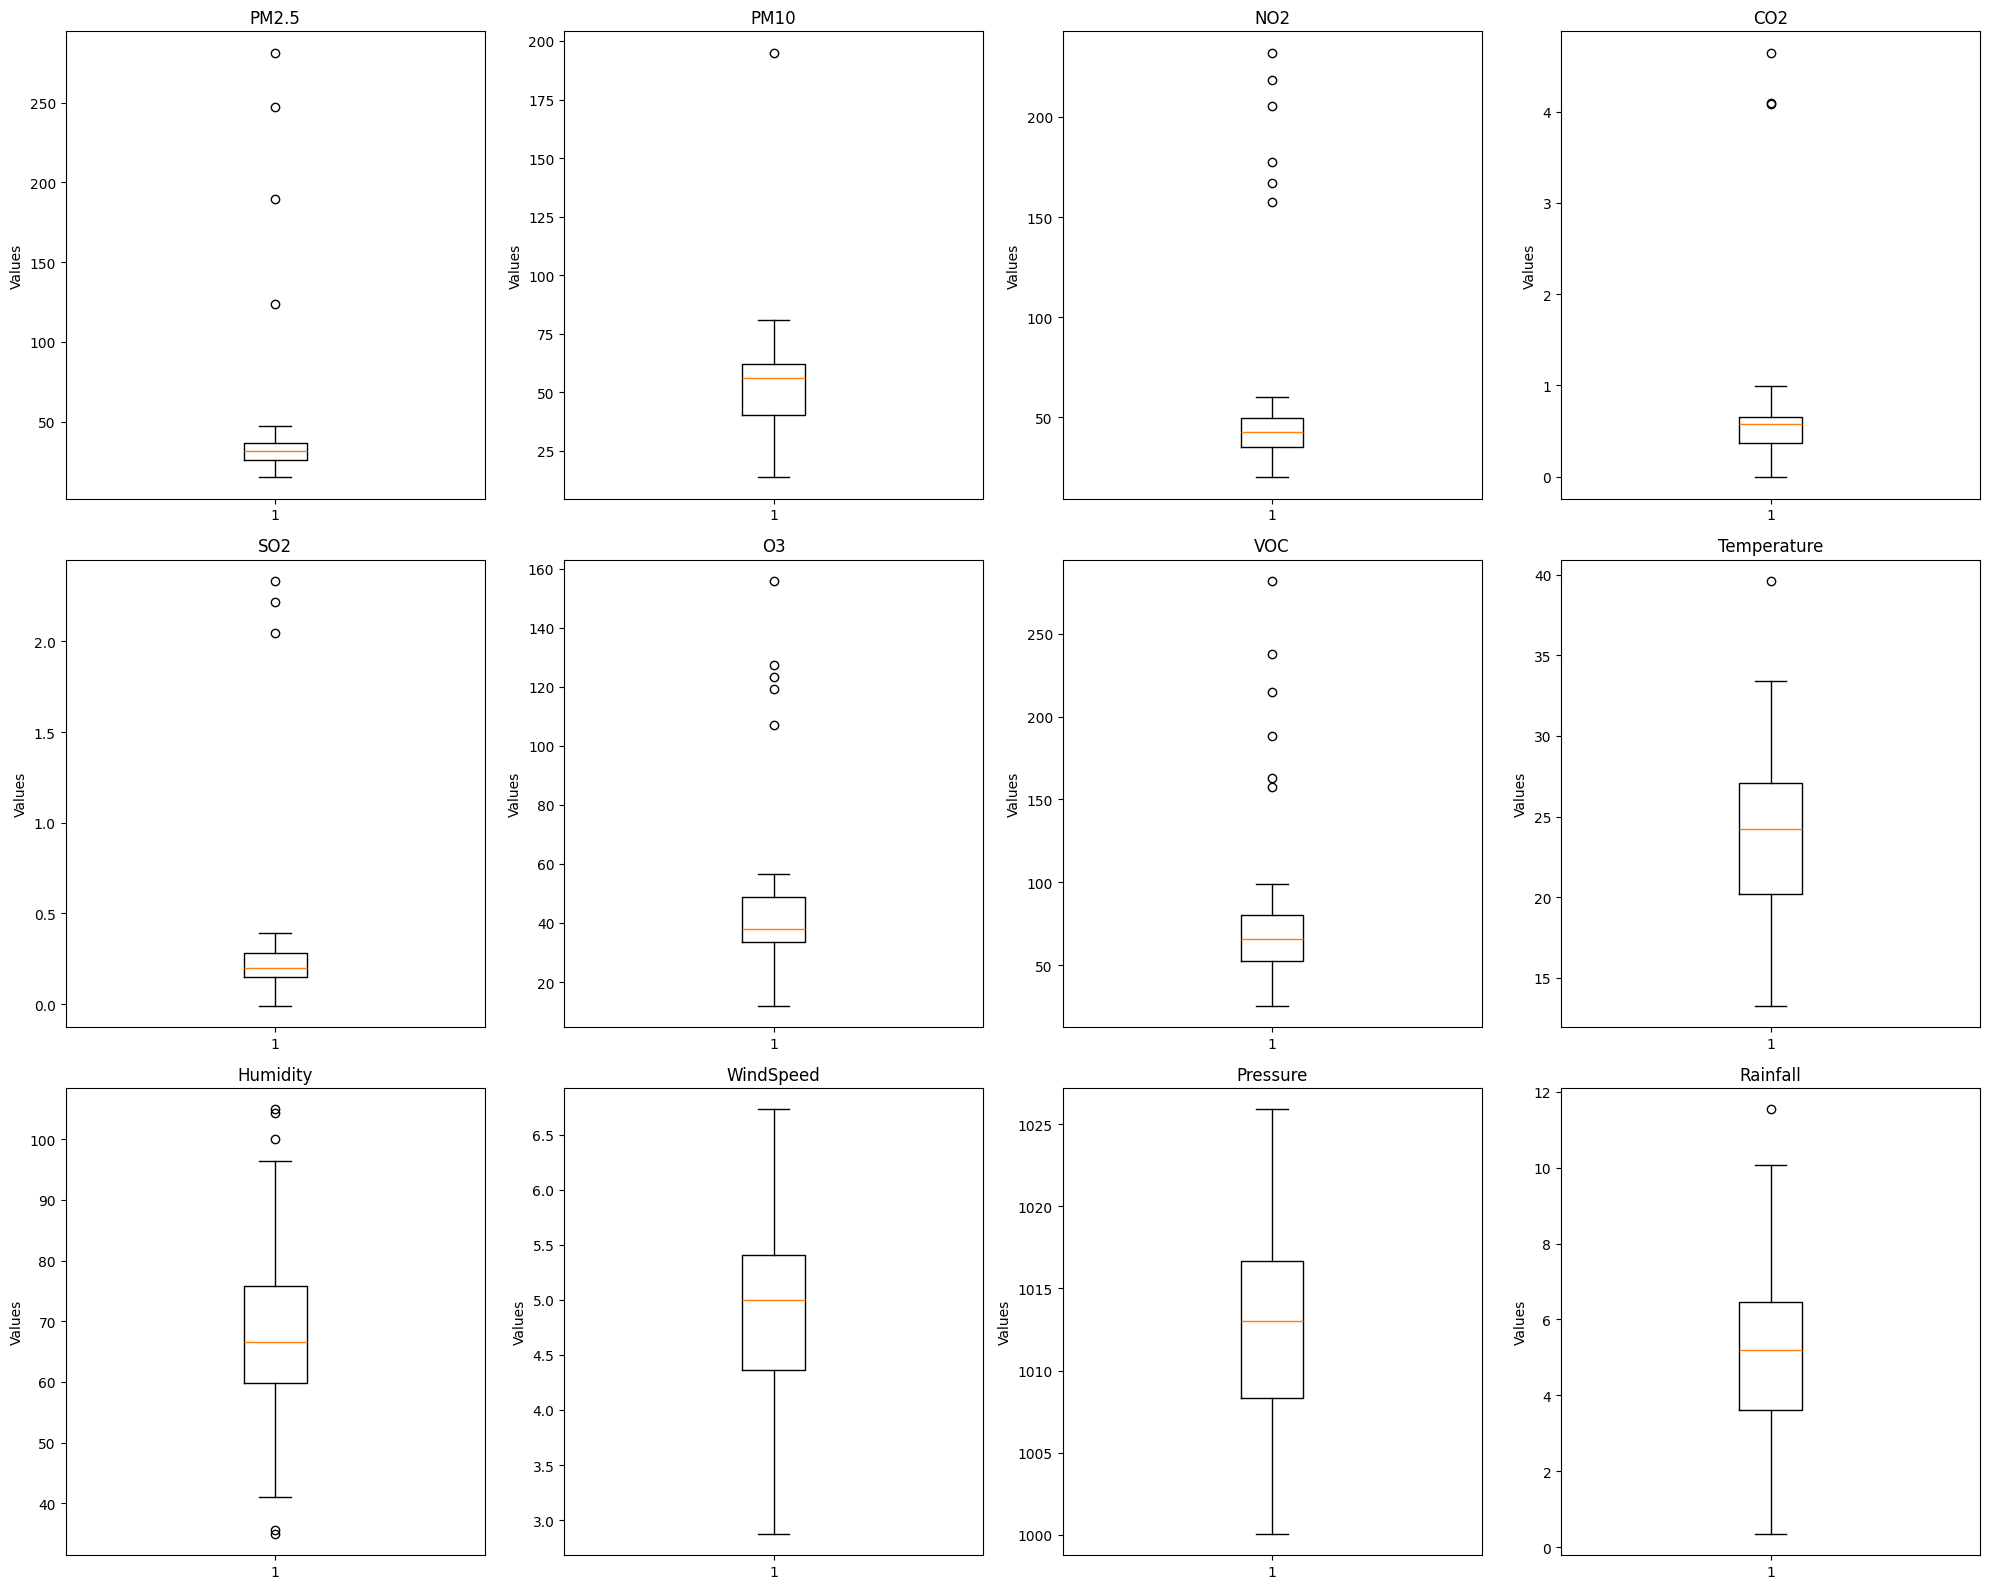

In [ ]:
fig, axes=matplotlib.pyplot.subplots(3, 4, figsize=(20, 16))
axes=axes.flatten()

for i, category in enumerate(categories):
    axes[i].boxplot(shanghai_province[category])
    axes[i].set_title(category)
    axes[i].set_ylabel('Values')

for j in range(len(categories), len(axes)):
  fig.delaxes(axes[j])

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


In [ ]:
#guangdong province

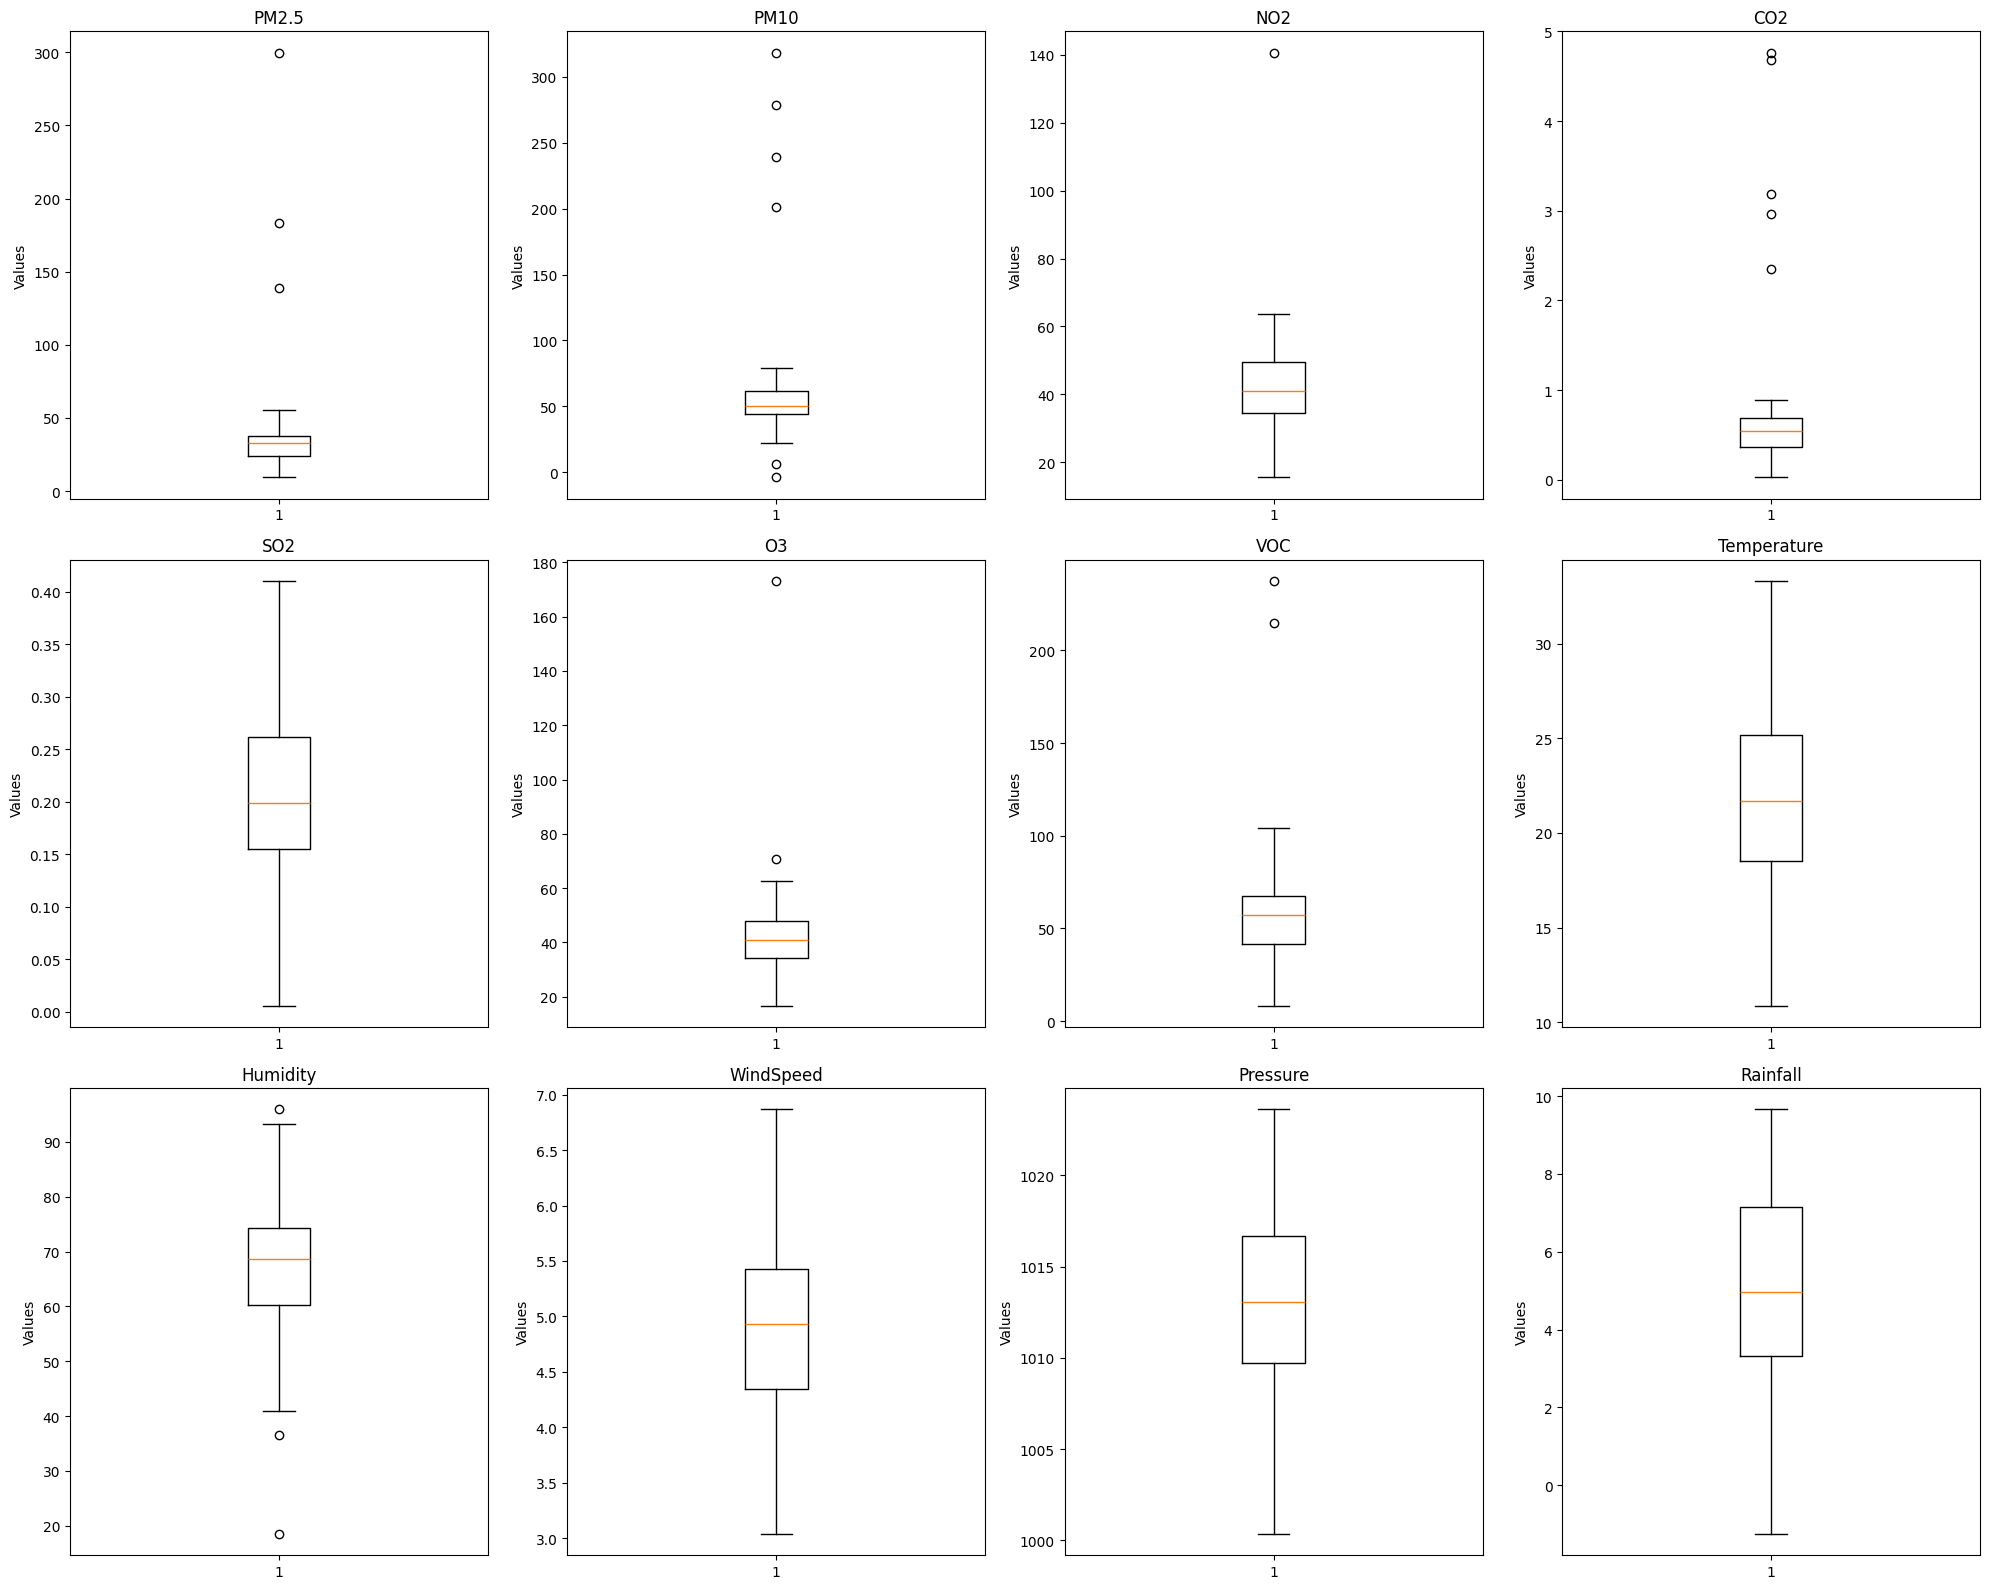

In [ ]:
fig, axes=matplotlib.pyplot.subplots(3, 4, figsize=(20, 16))
axes=axes.flatten()

for i, category in enumerate(categories):
    axes[i].boxplot(guangdong_province[category])
    axes[i].set_title(category)
    axes[i].set_ylabel('Values')

for j in range(len(categories), len(axes)):
  fig.delaxes(axes[j])

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


## outliers tratament

In [ ]:
# outliers tratament

In [ ]:
# beijing outliers trataments

In [ ]:
for category in categories:
    quantile_one=beijing_province[category].quantile(0.25)
    quantile_three=beijing_province[category].quantile(0.75)

    interquartile_range=quantile_three - quantile_one

    lower_bound=quantile_one - 1.5 * interquartile_range
    upper_bound=quantile_three + 1.5 * interquartile_range

    mean_value=beijing_province[category].mean()

    beijing_province[category] = beijing_province[category].apply(
        lambda x: mean_value if x < lower_bound or x > upper_bound else x
    )


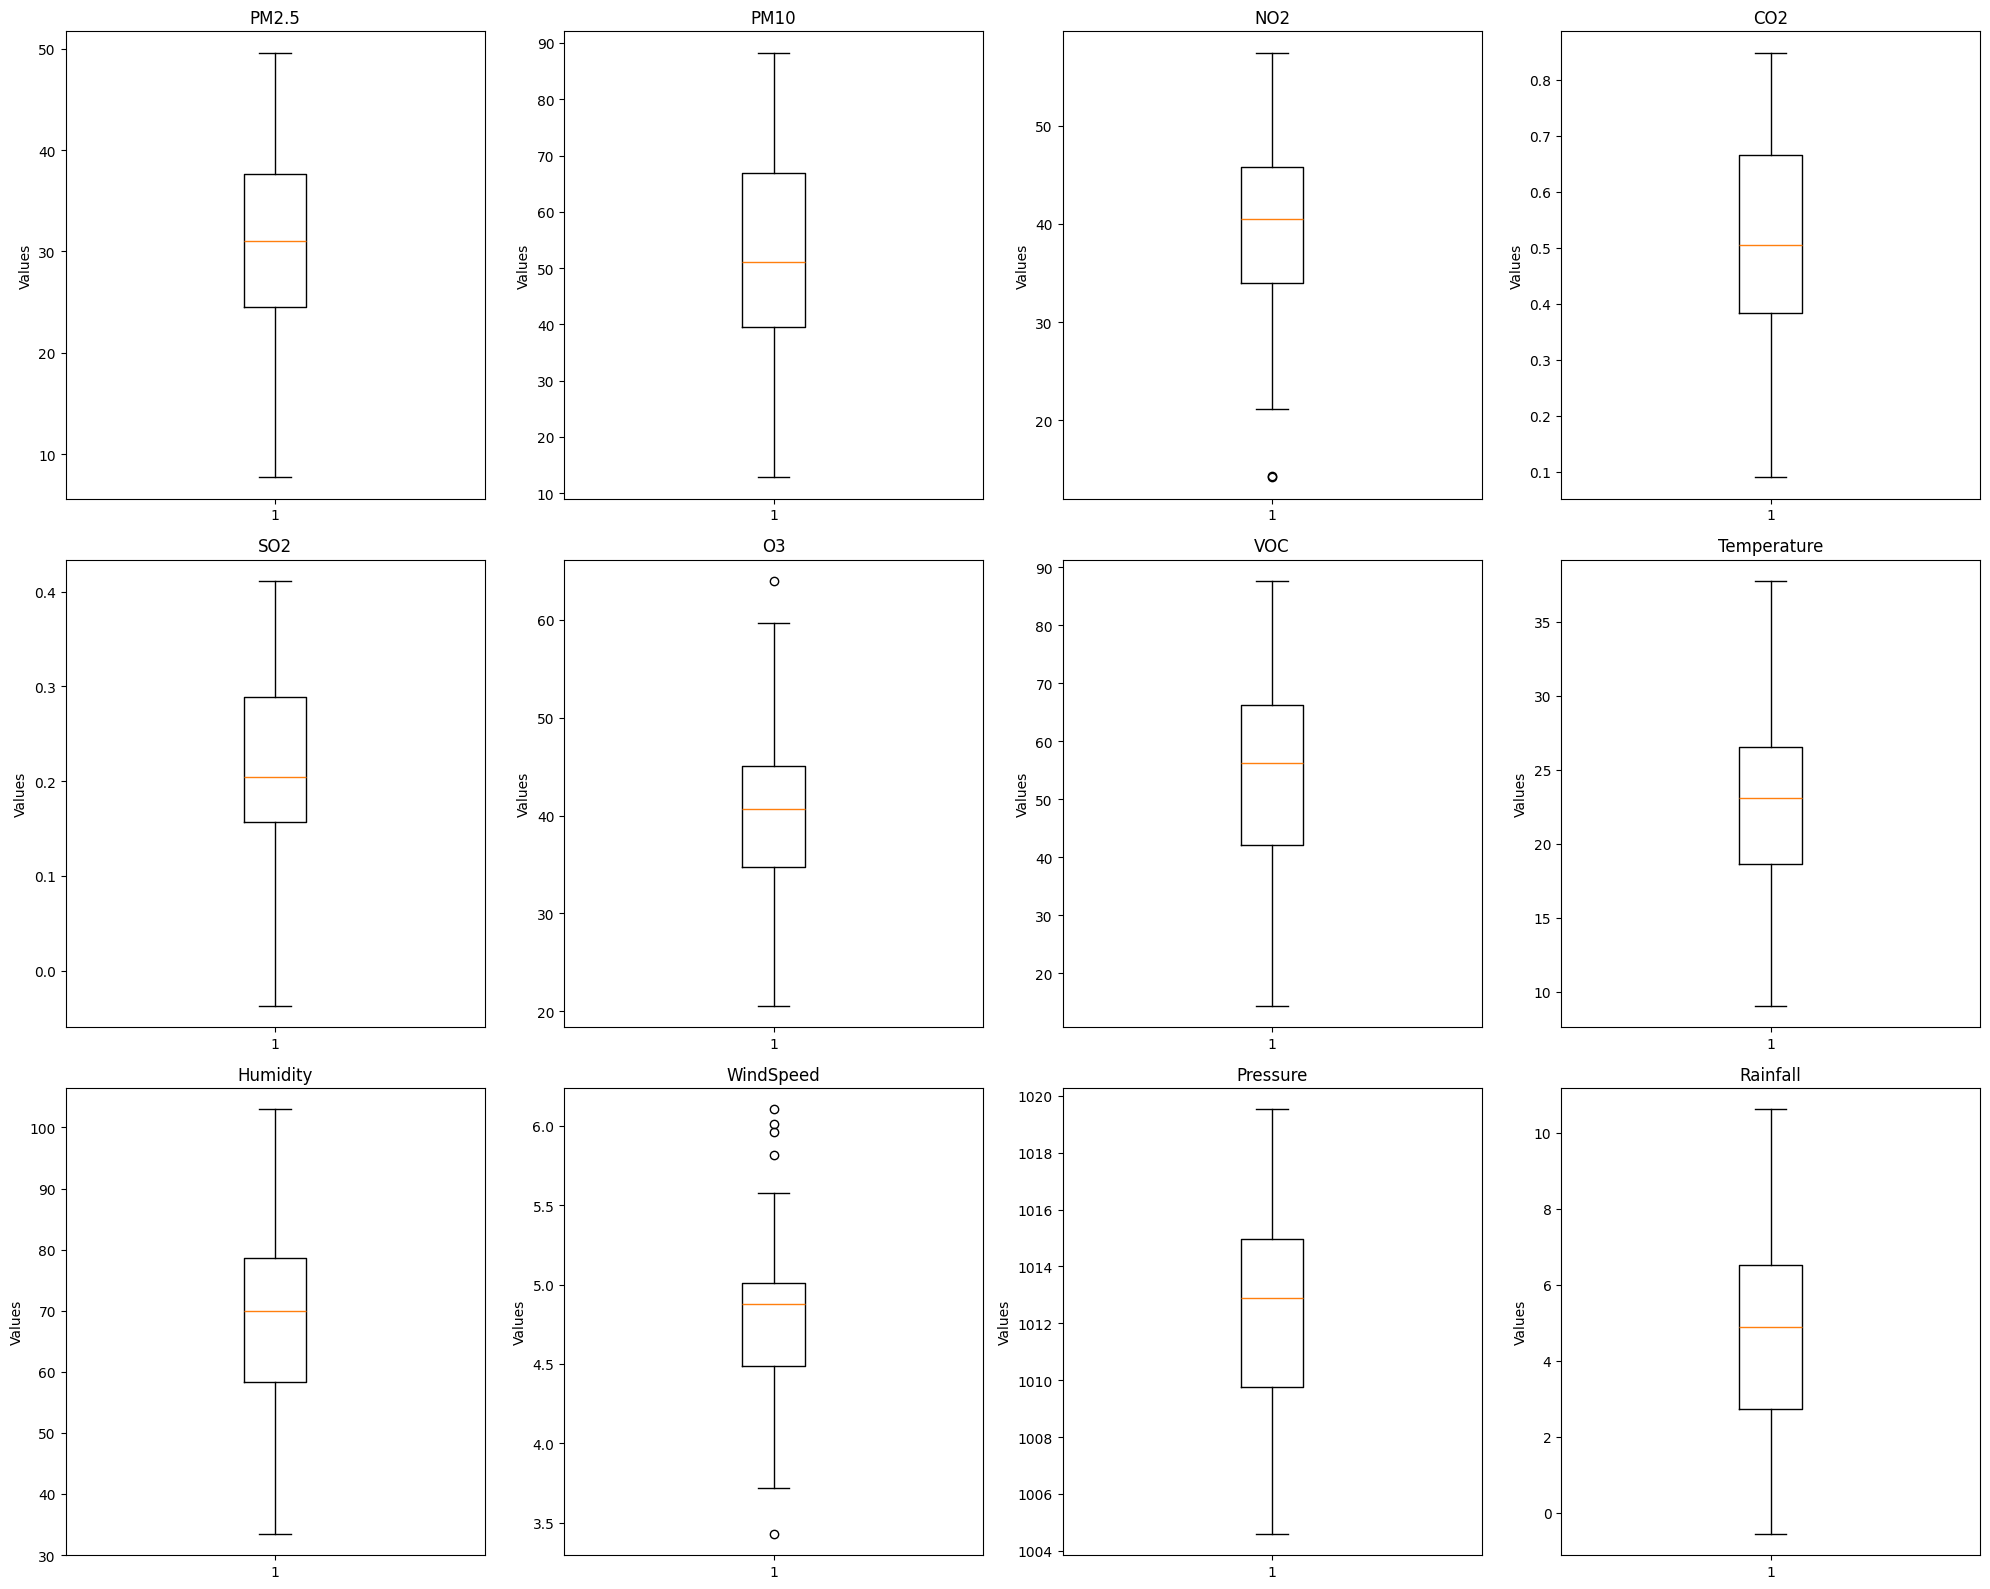

In [ ]:
fig, axes=matplotlib.pyplot.subplots(3, 4, figsize=(20, 16))
axes=axes.flatten()

for i, category in enumerate(categories):
    axes[i].boxplot(beijing_province[category])
    axes[i].set_title(category)
    axes[i].set_ylabel('Values')

for j in range(len(categories), len(axes)):
  fig.delaxes(axes[j])

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


In [ ]:
# shanghai outliers tratament

In [ ]:
for category in categories:
    quantile_one=shanghai_province[category].quantile(0.25)
    quantile_three=shanghai_province[category].quantile(0.75)

    interquartile_range=quantile_three - quantile_one

    lower_bound=quantile_one - 1.5 * interquartile_range
    upper_bound=quantile_three + 1.5 * interquartile_range

    mean_value=shanghai_province[category].mean()

    shanghai_province[category]=shanghai_province[category].apply(
        lambda x: mean_value if x < lower_bound or x > upper_bound else x
    )


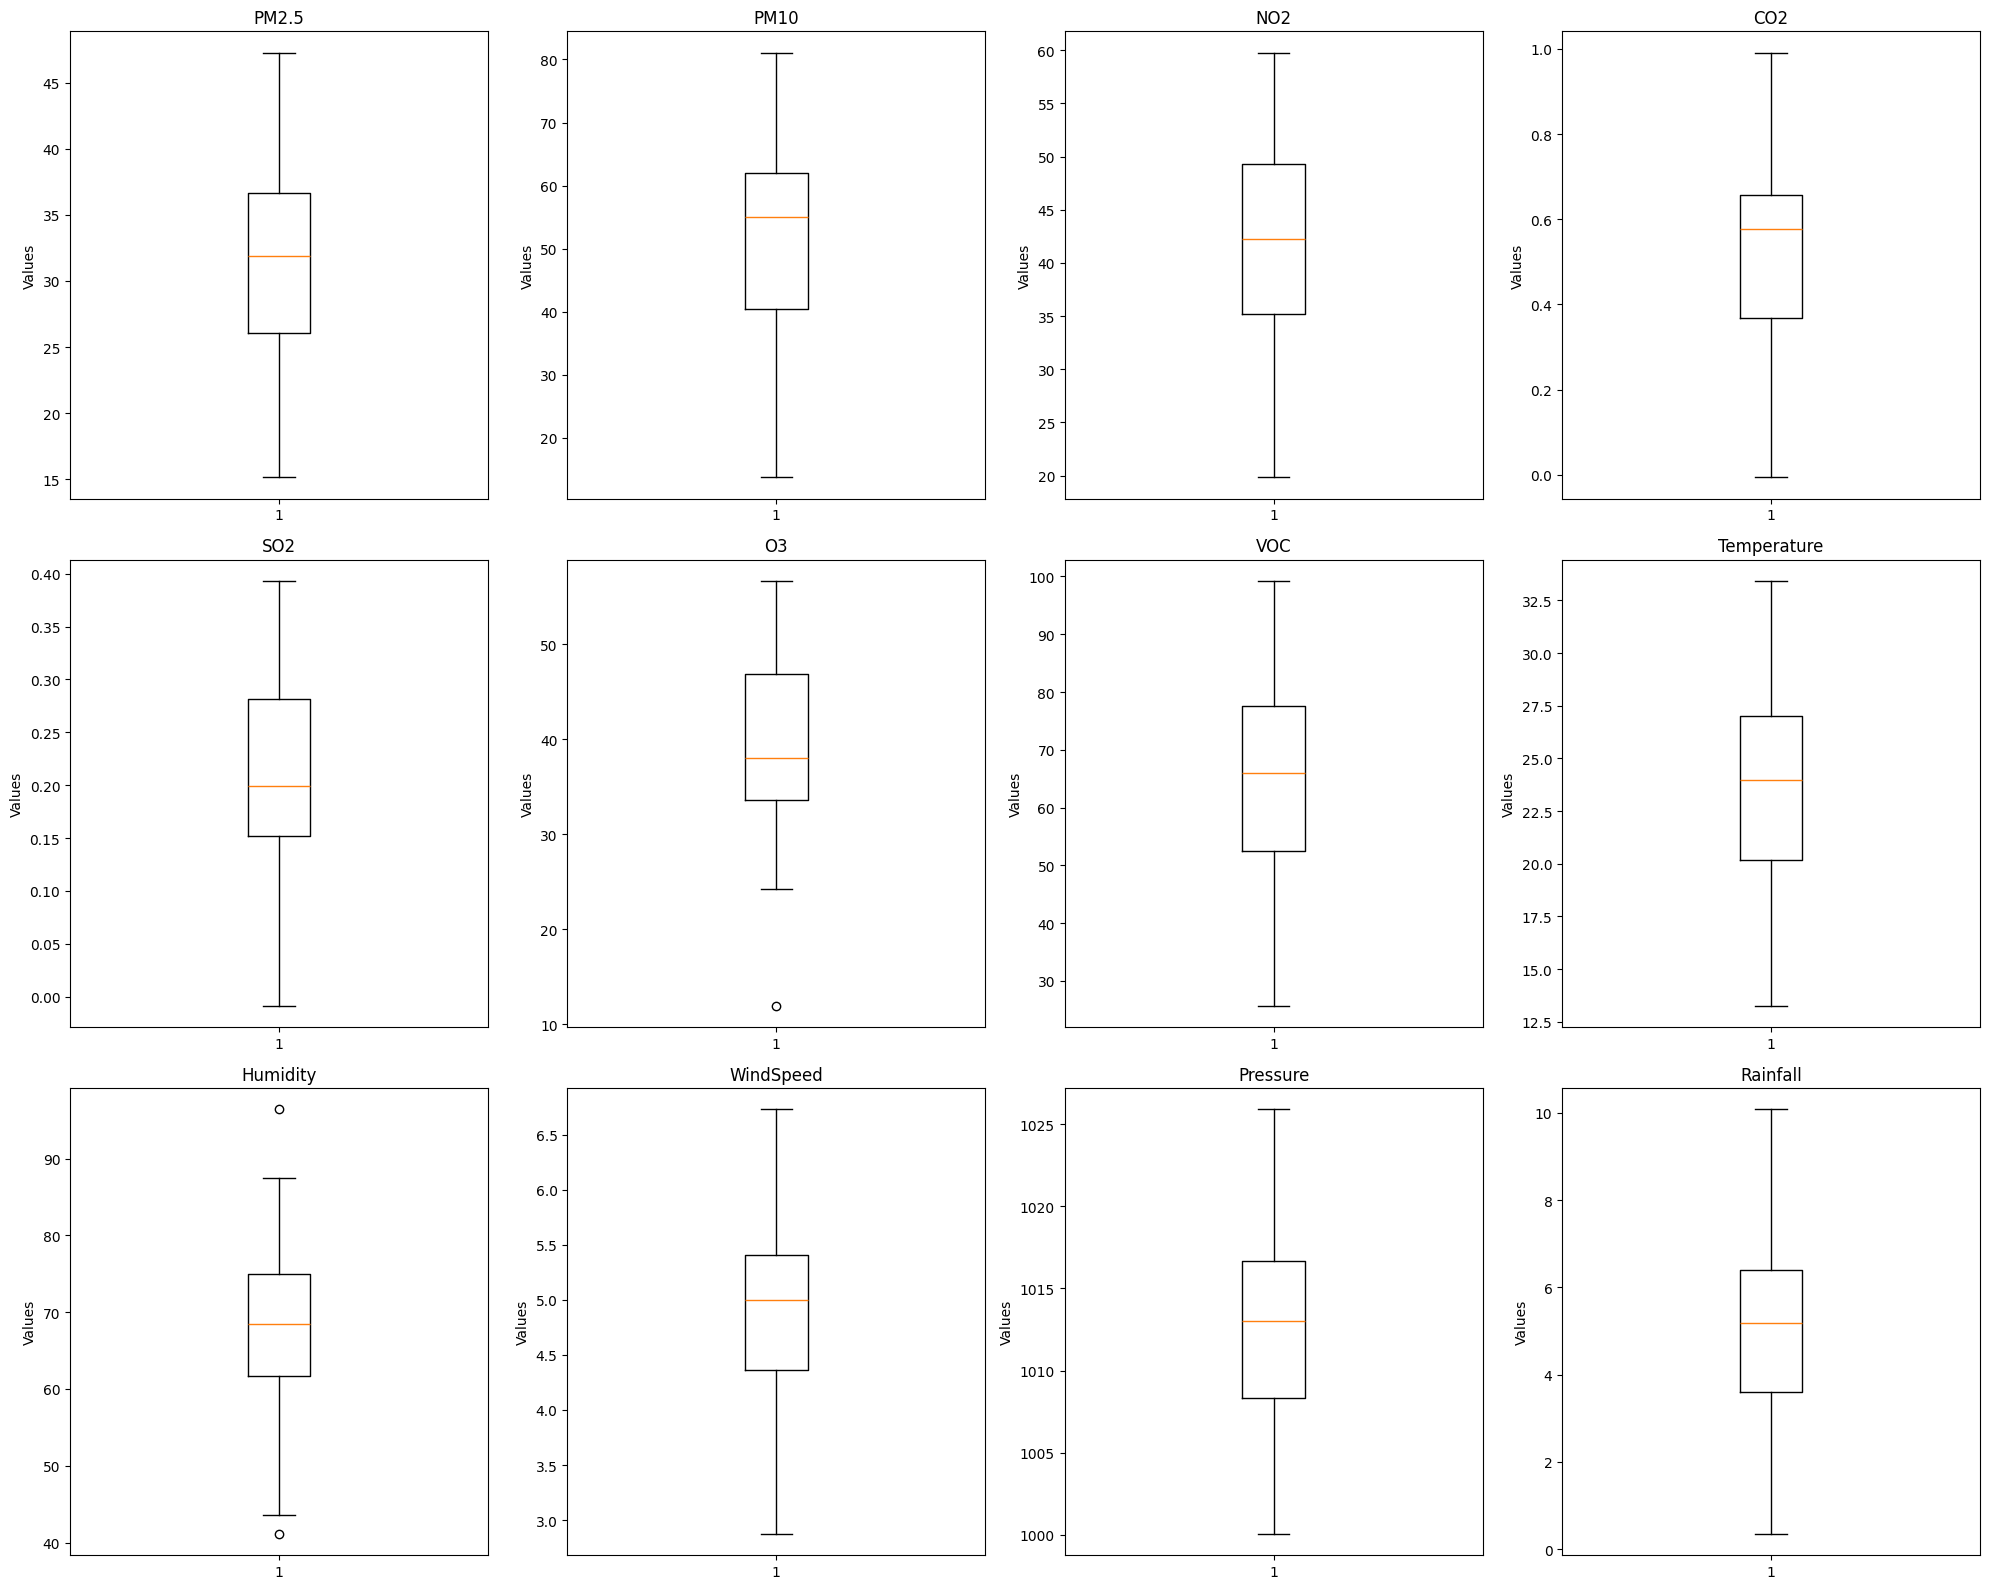

In [ ]:
fig, axes=matplotlib.pyplot.subplots(3, 4, figsize=(20, 16))
axes=axes.flatten()

for i, category in enumerate(categories):
    axes[i].boxplot(shanghai_province[category])
    axes[i].set_title(category)
    axes[i].set_ylabel('Values')

for j in range(len(categories), len(axes)):
  fig.delaxes(axes[j])

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


In [ ]:
# guangdong outliers tratament

In [ ]:
for category in categories:
    quantile_one=guangdong_province[category].quantile(0.25)
    quantile_three=guangdong_province[category].quantile(0.75)

    interquartile_range=quantile_three - quantile_one

    lower_bound=quantile_one - 1.5 * interquartile_range
    upper_bound=quantile_three + 1.5 * interquartile_range

    mean_value=guangdong_province[category].mean()

    guangdong_province[category]=guangdong_province[category].apply(
        lambda x: mean_value if x < lower_bound or x > upper_bound else x
    )


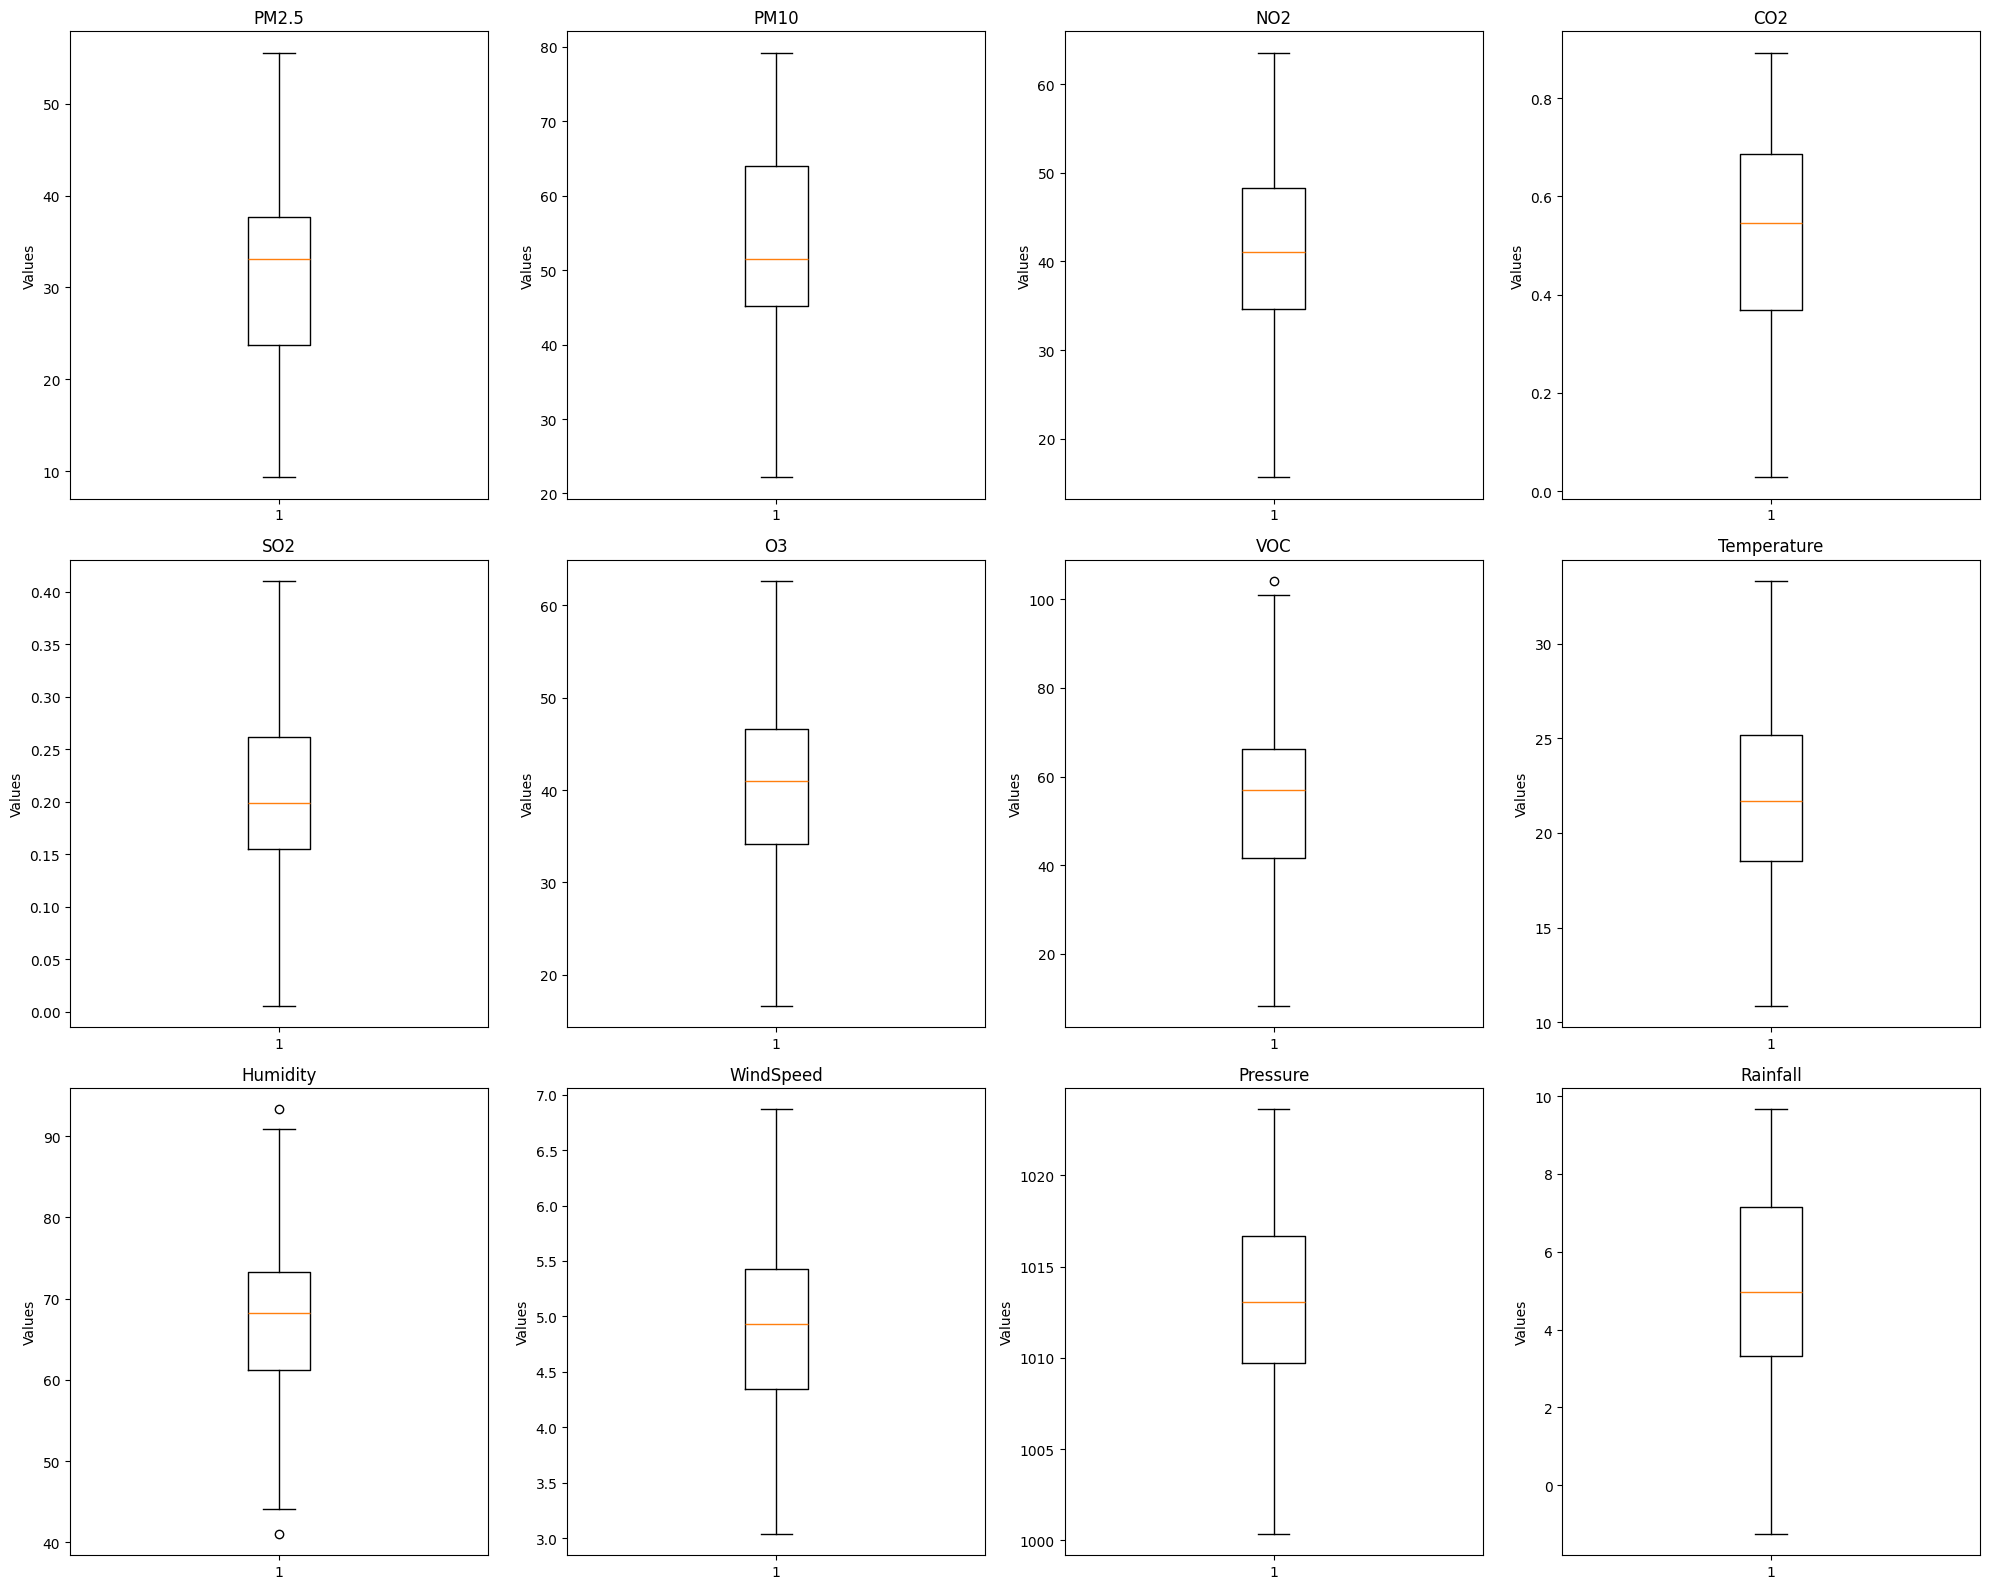

In [ ]:
fig, axes=matplotlib.pyplot.subplots(3, 4, figsize=(20, 16))
axes=axes.flatten()

for i, category in enumerate(categories):
    axes[i].boxplot(guangdong_province[category])
    axes[i].set_title(category)
    axes[i].set_ylabel('Values')

for j in range(len(categories), len(axes)):
  fig.delaxes(axes[j])

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


# data visualization

In [ ]:
'''
columns the company wants to analyze
PM2.5
PM10
NO2
Temperature
O3

columns that company doesn't want much development
VOC(Volatile Organic Compounds)
SO2
CO2
Humidity
WindSpeed
Pressure
Rainfall
'''

"\ncolumns the company wants to analyze\nPM2.5\nPM10\nNO2\nTemperature\nO3\n\ncolumns that company doesn't want much development\nVOC(Volatile Organic Compounds)\nSO2\nCO2\nHumidity\nWindSpeed\nPressure\nRainfall\n"

## imports

In [ ]:
import matplotlib.pyplot
import seaborn
import plotly.express
import bokeh.plotting

### line chart, histogram chart - beijing

In [ ]:
# beijing province data visualization

In [ ]:
# PM2.5

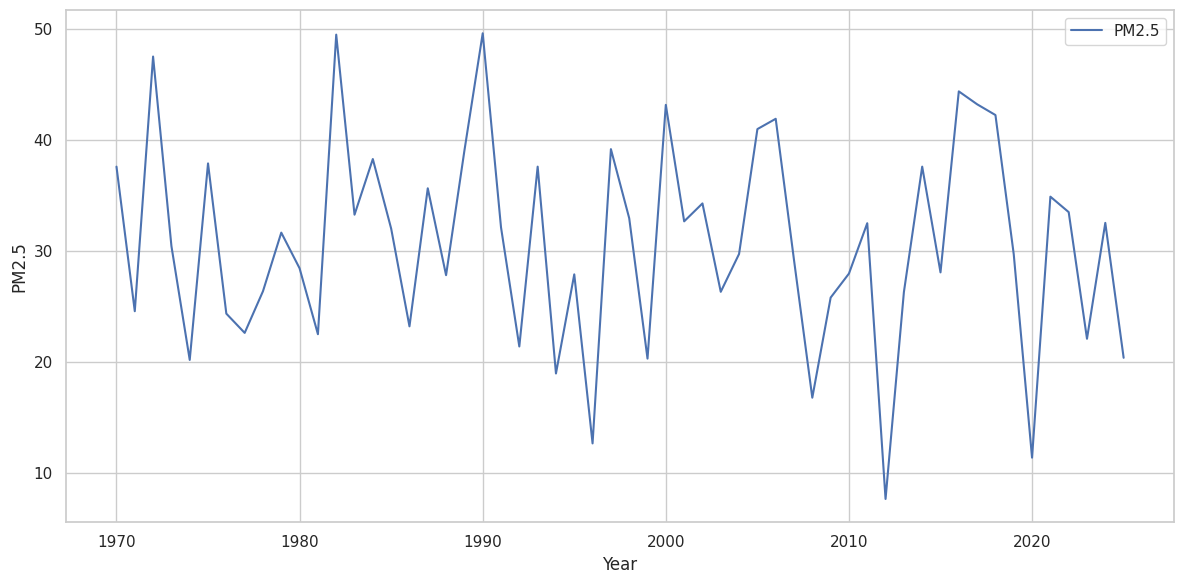

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=beijing_province['Year'], y=beijing_province['PM2.5'], label='PM2.5')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='PM2.5', ylabel='Count'>

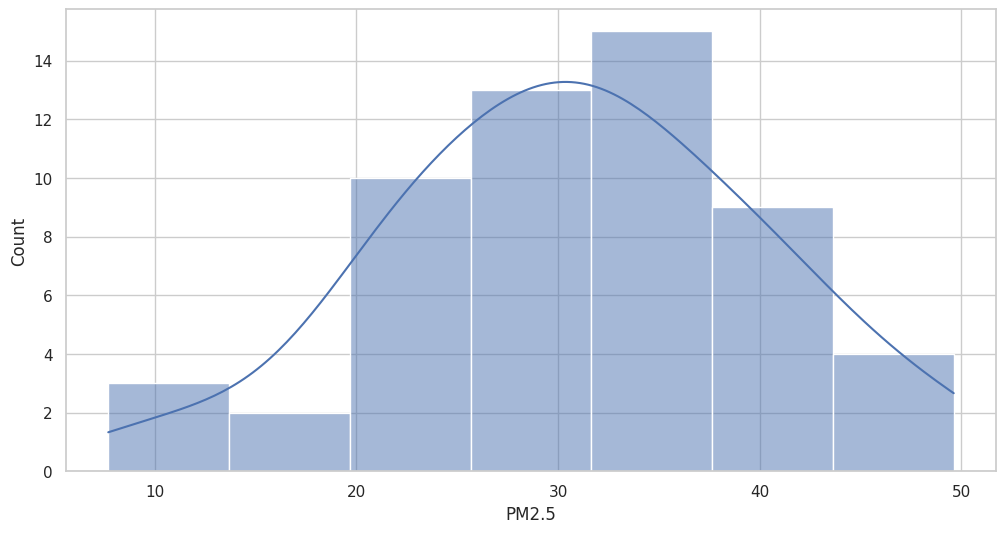

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(beijing_province['PM2.5'], kde=True)

In [ ]:
# PM10

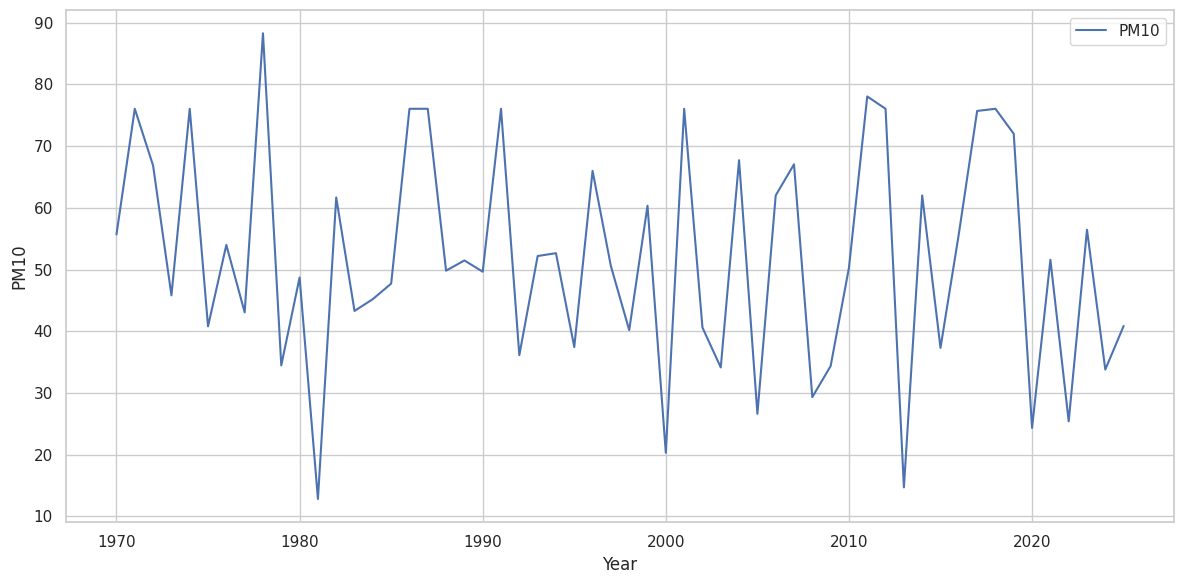

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=beijing_province['Year'], y=beijing_province['PM10'], label='PM10')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='PM10', ylabel='Count'>

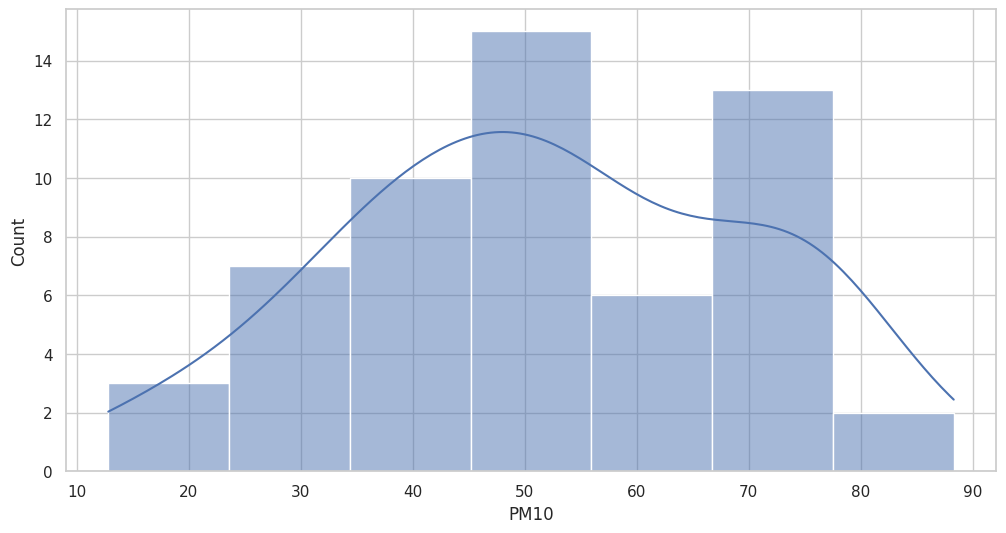

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(beijing_province['PM10'], kde=True)

In [ ]:
# NO2 - Nitrogen Dioxide

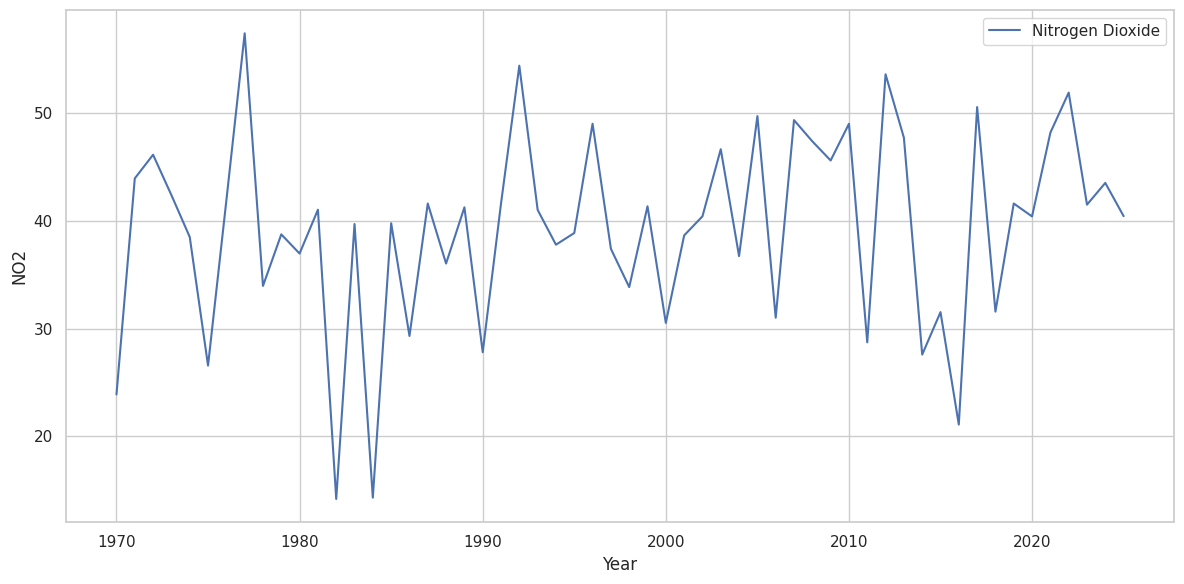

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=beijing_province['Year'], y=beijing_province['NO2'], label='Nitrogen Dioxide')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='NO2', ylabel='Count'>

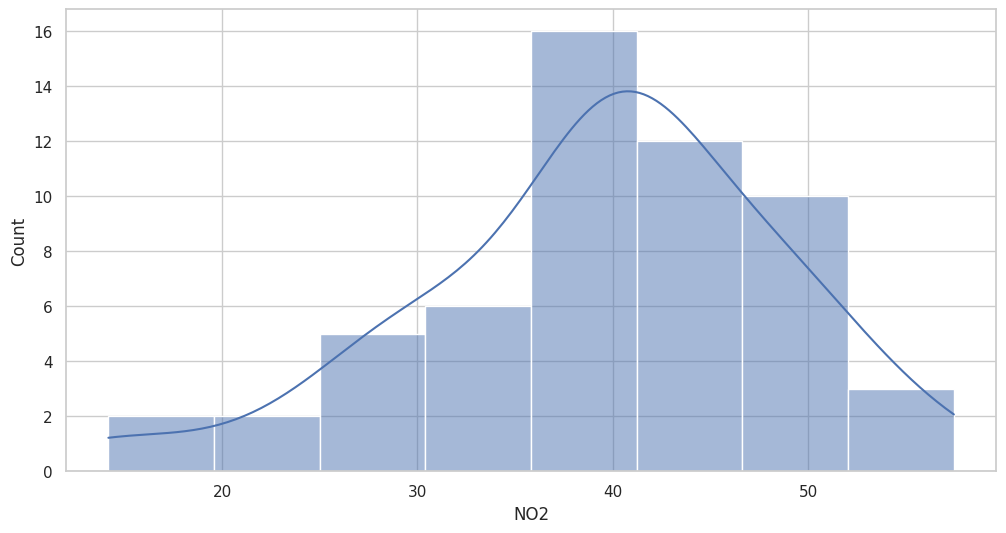

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(beijing_province['NO2'], kde=True)

In [ ]:
# Temperature

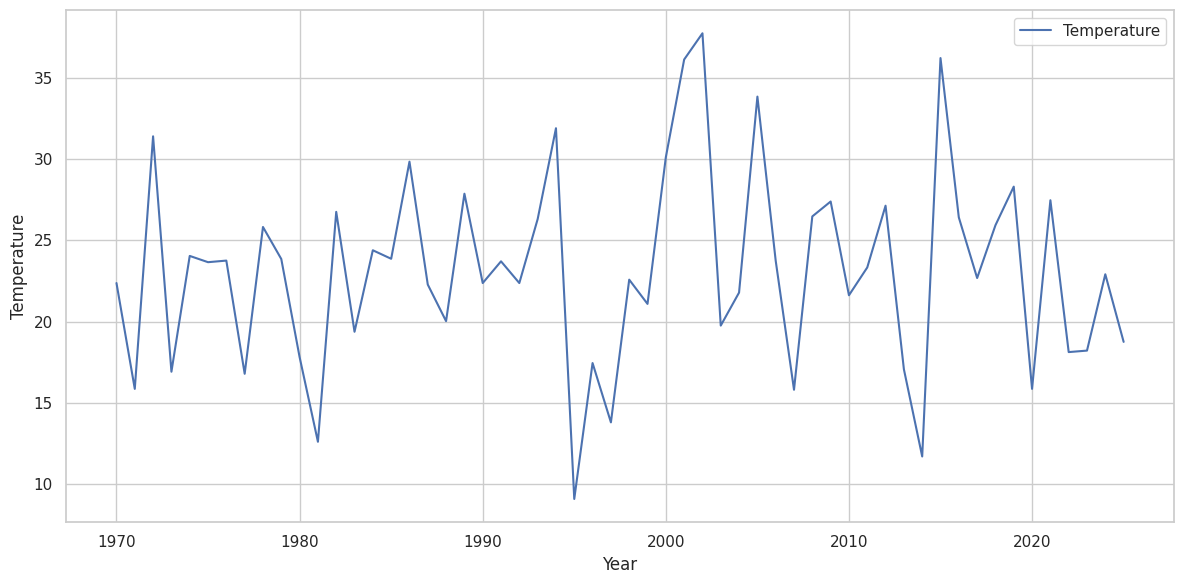

In [ ]:
#line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=beijing_province['Year'], y=beijing_province['Temperature'], label='Temperature')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='Temperature', ylabel='Count'>

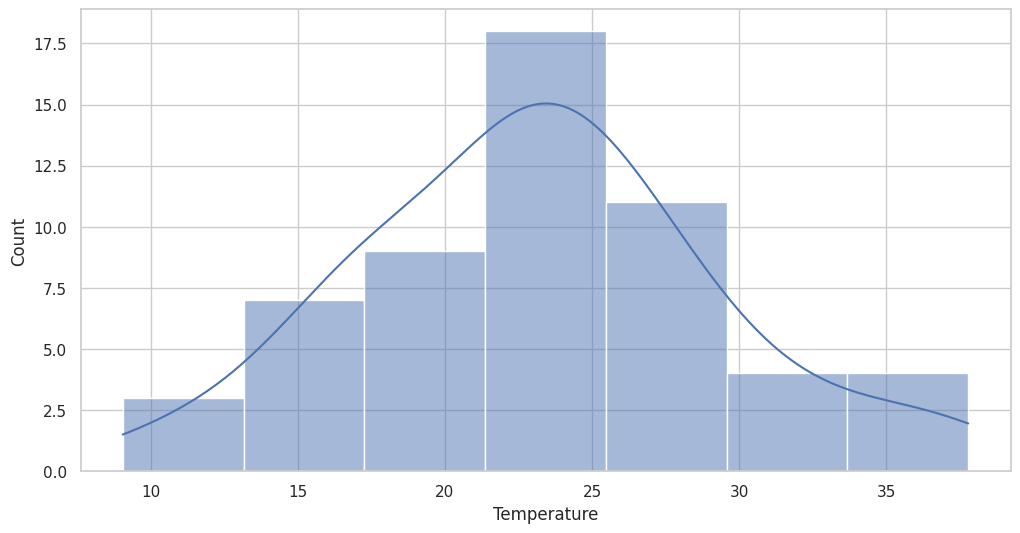

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(beijing_province['Temperature'], kde=True)

In [ ]:
# O3 - Ozone

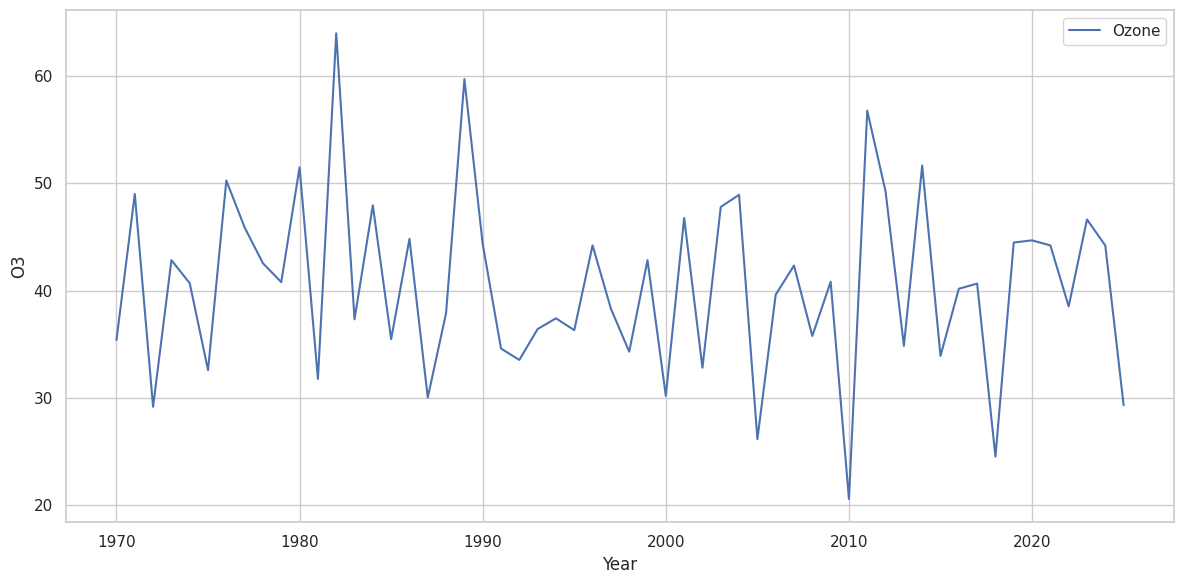

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=beijing_province['Year'], y=beijing_province['O3'], label='Ozone')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='O3', ylabel='Count'>

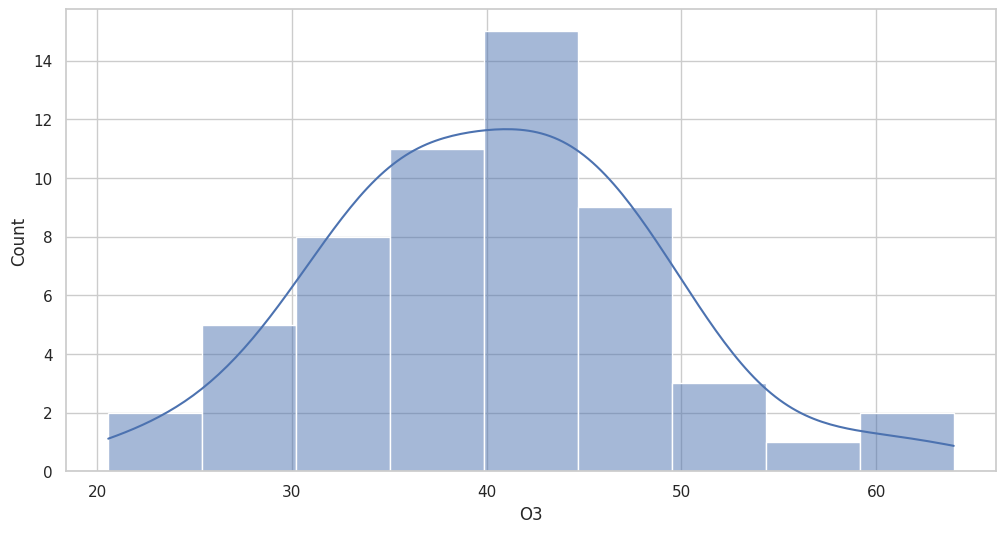

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(beijing_province['O3'], kde=True)

### line chart, histogram chart - shanghai

In [ ]:
# shanghai province data visualization

In [ ]:
# PM2.5

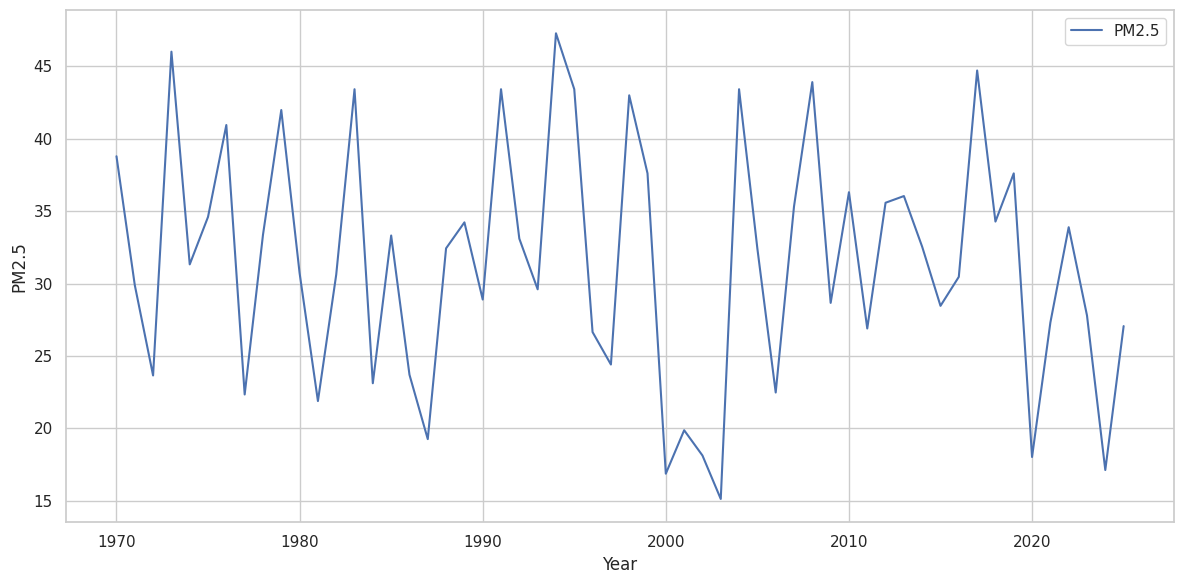

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=shanghai_province['Year'], y=shanghai_province['PM2.5'], label='PM2.5')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='PM2.5', ylabel='Count'>

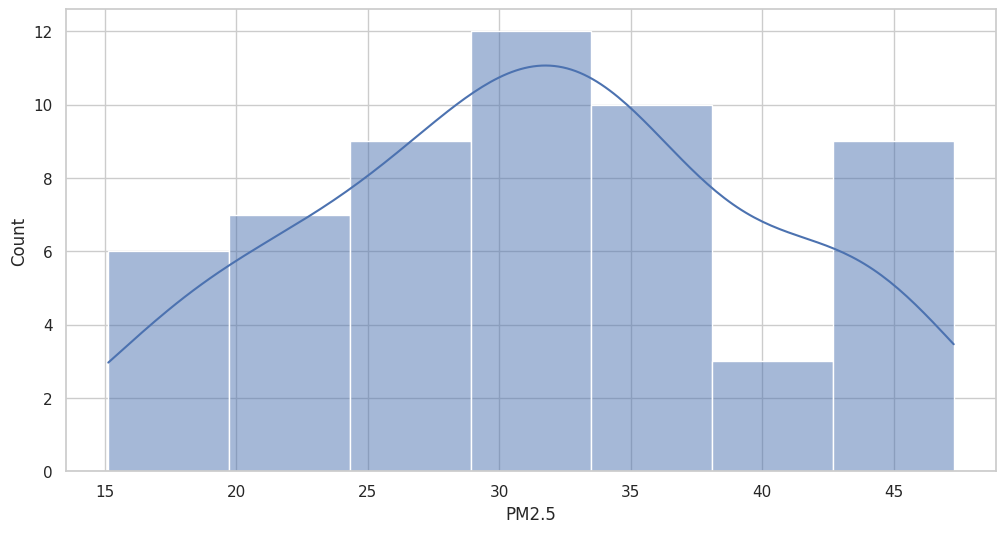

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(shanghai_province['PM2.5'], kde=True)

In [ ]:
# PM10

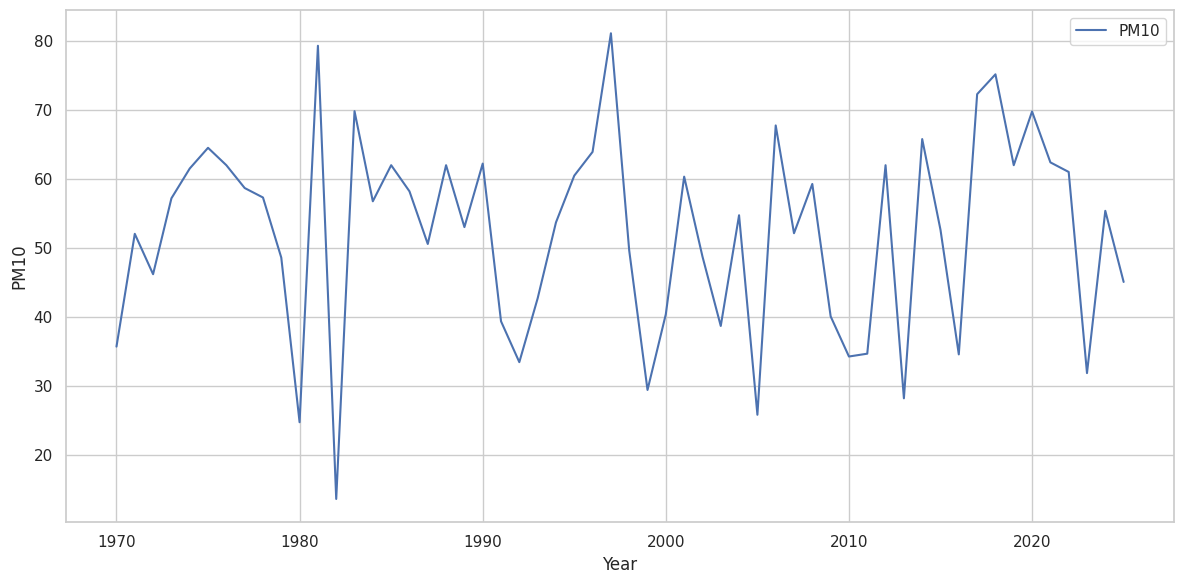

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=shanghai_province['Year'], y=shanghai_province['PM10'], label='PM10')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='PM10', ylabel='Count'>

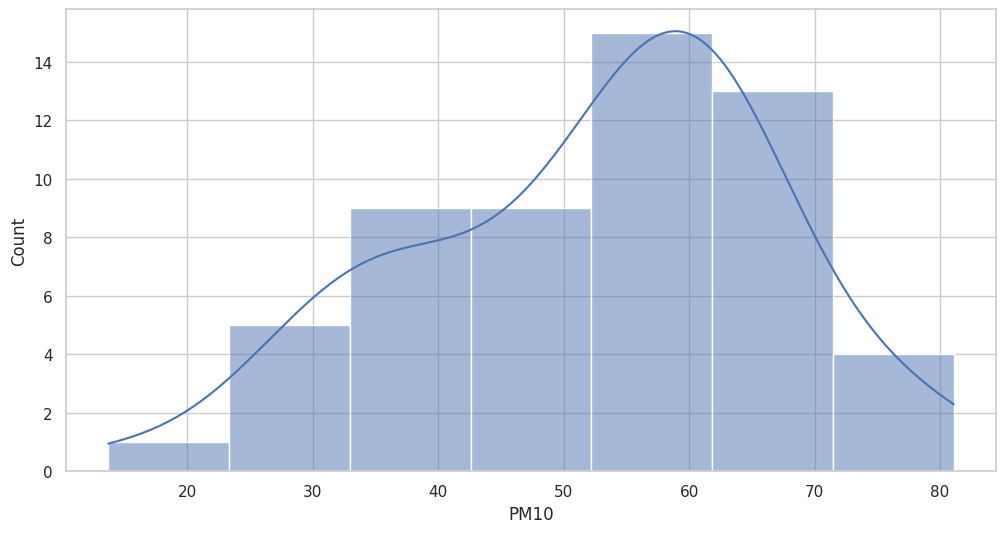

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(shanghai_province['PM10'], kde=True)

In [ ]:
# NO2 - Nitrogen Dioxide

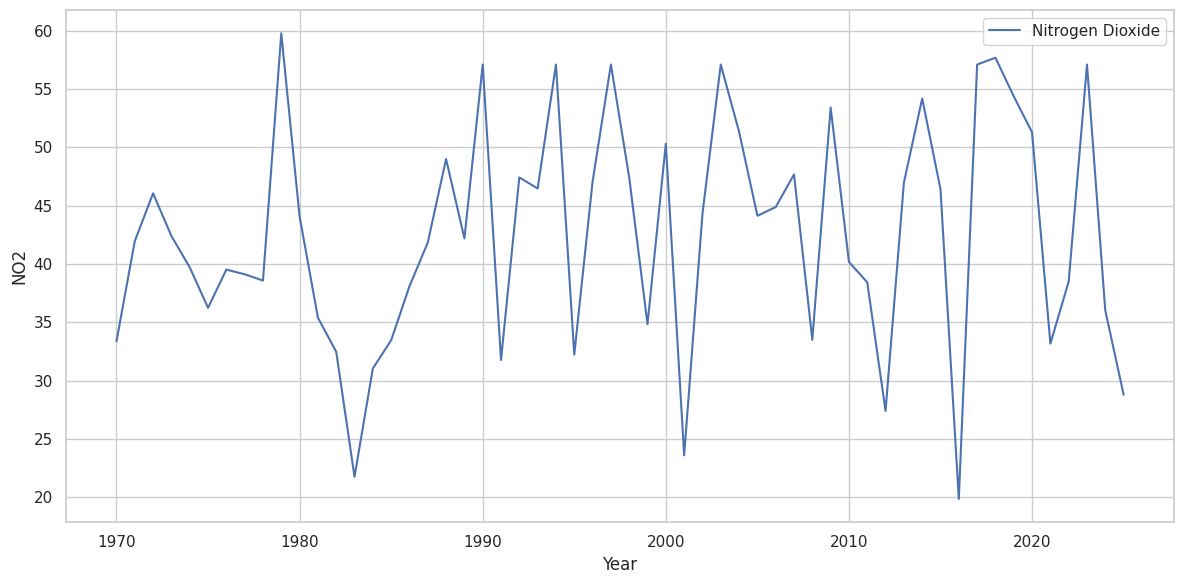

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=shanghai_province['Year'], y=shanghai_province['NO2'], label='Nitrogen Dioxide')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='NO2', ylabel='Count'>

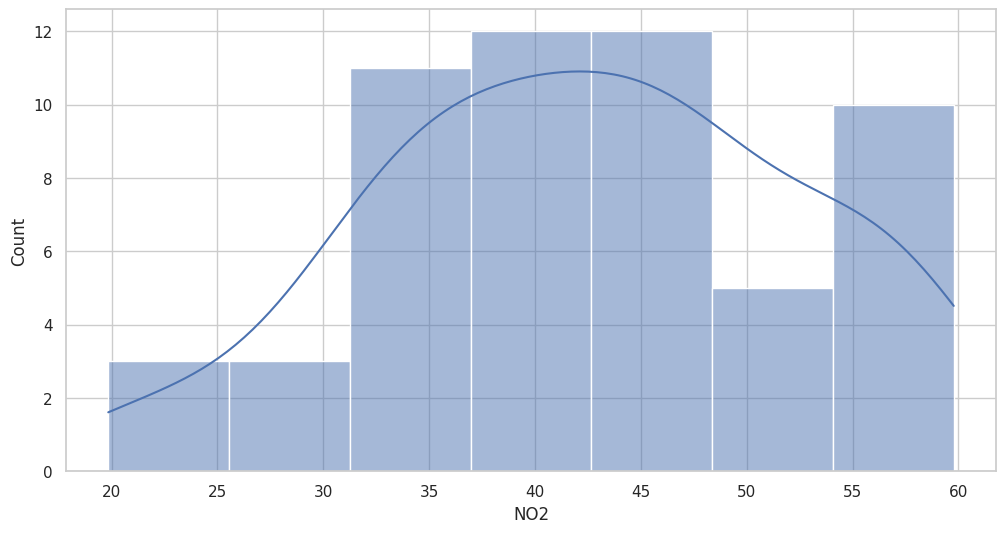

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(shanghai_province['NO2'], kde=True)

In [ ]:
# Temperature

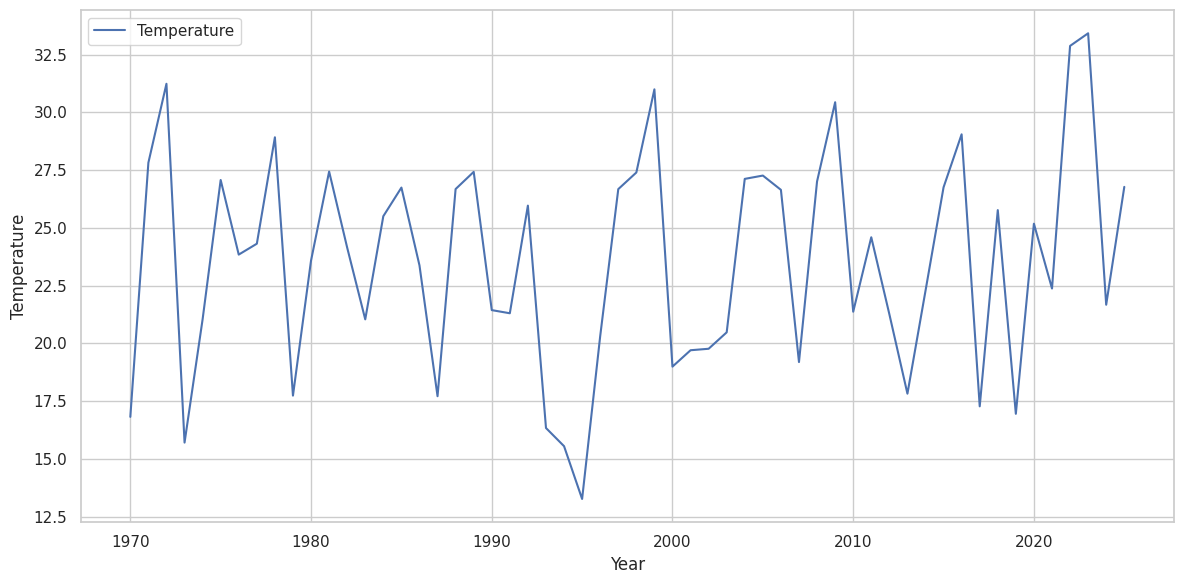

In [ ]:
#line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=shanghai_province['Year'], y=shanghai_province['Temperature'], label='Temperature')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='Temperature', ylabel='Count'>

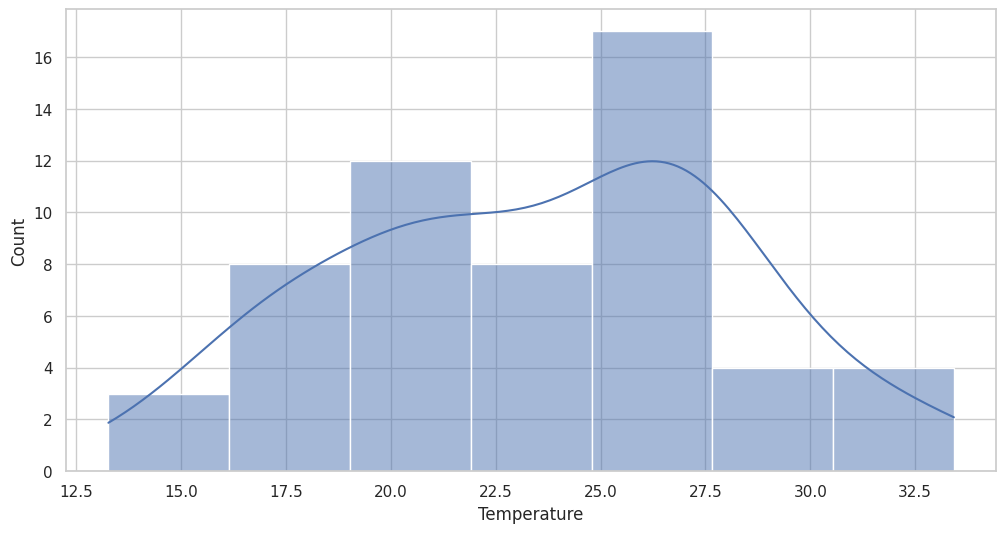

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(shanghai_province['Temperature'], kde=True)

In [ ]:
# O3 - Ozone

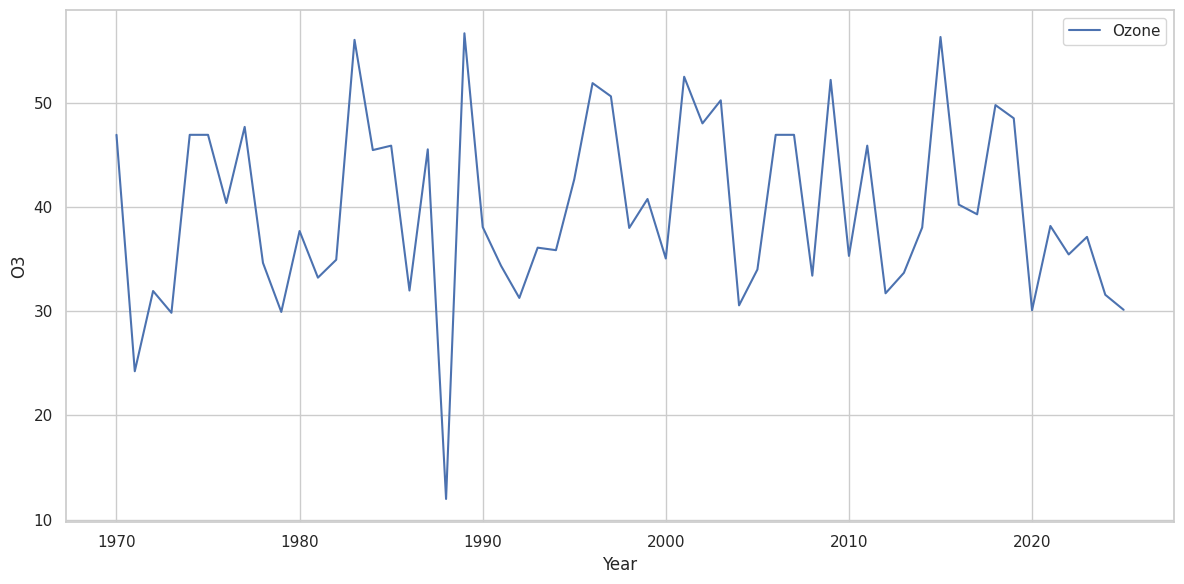

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=shanghai_province['Year'], y=shanghai_province['O3'], label='Ozone')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='O3', ylabel='Count'>

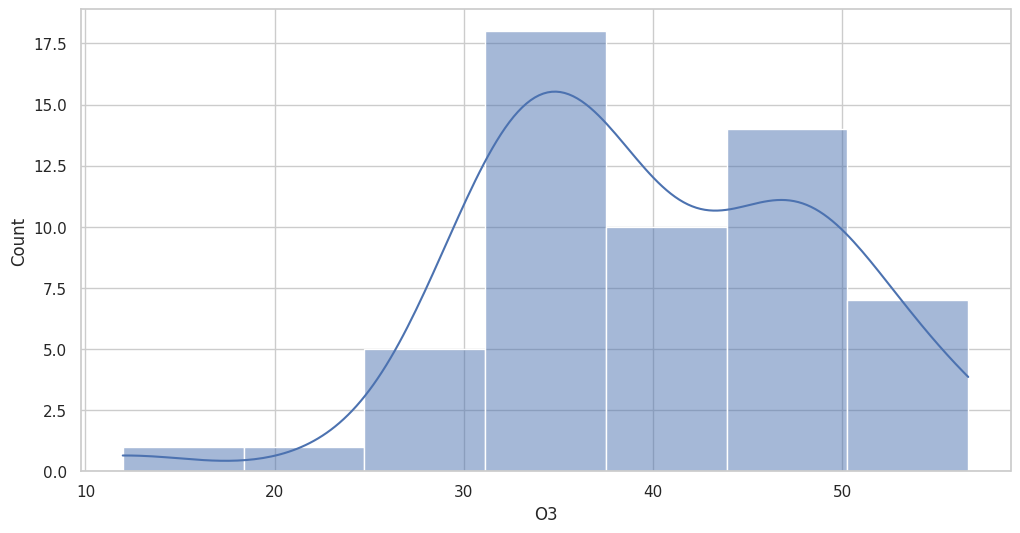

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(shanghai_province['O3'], kde=True)

### line chart, histogram chart - guangdong

In [ ]:
# guangdong province data visualization

In [ ]:
# PM2.5

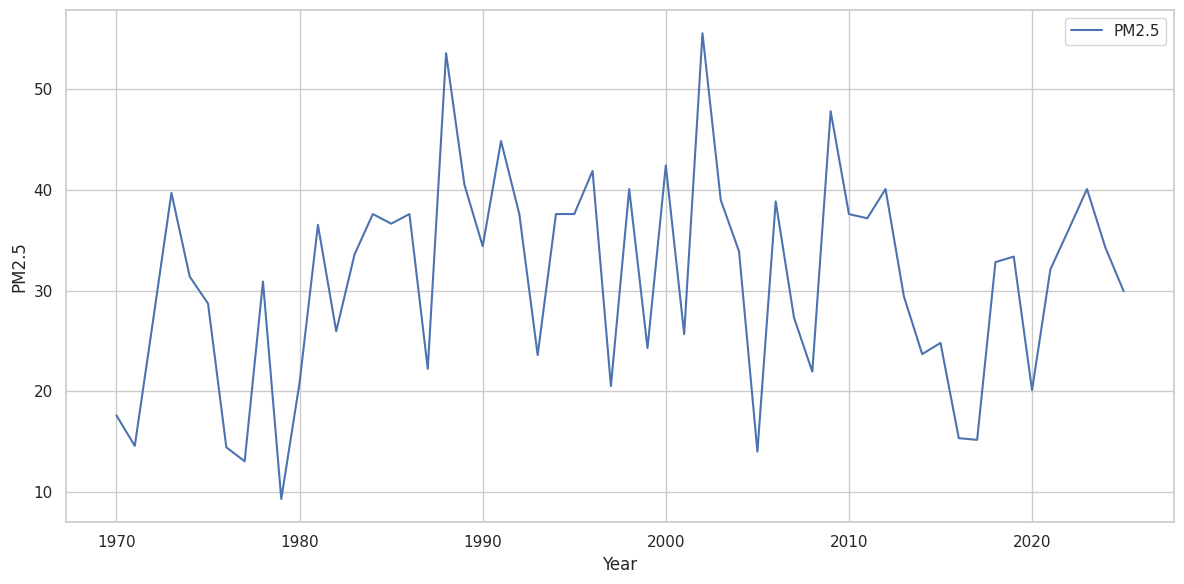

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=guangdong_province['Year'], y=guangdong_province['PM2.5'], label='PM2.5')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='PM2.5', ylabel='Count'>

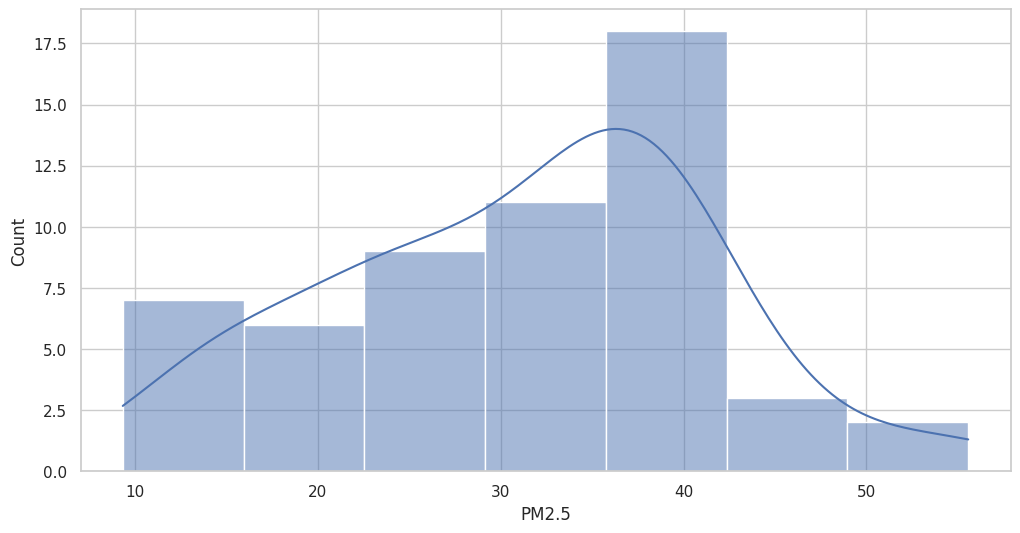

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(guangdong_province['PM2.5'], kde=True)

In [ ]:
# PM10

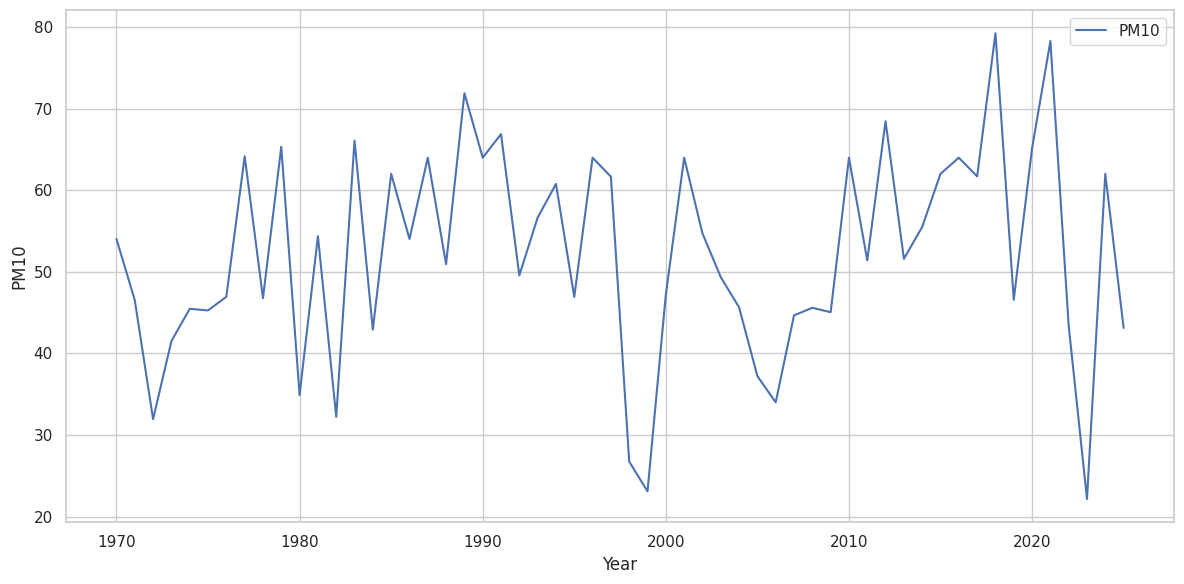

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=guangdong_province['Year'], y=guangdong_province['PM10'], label='PM10')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='PM10', ylabel='Count'>

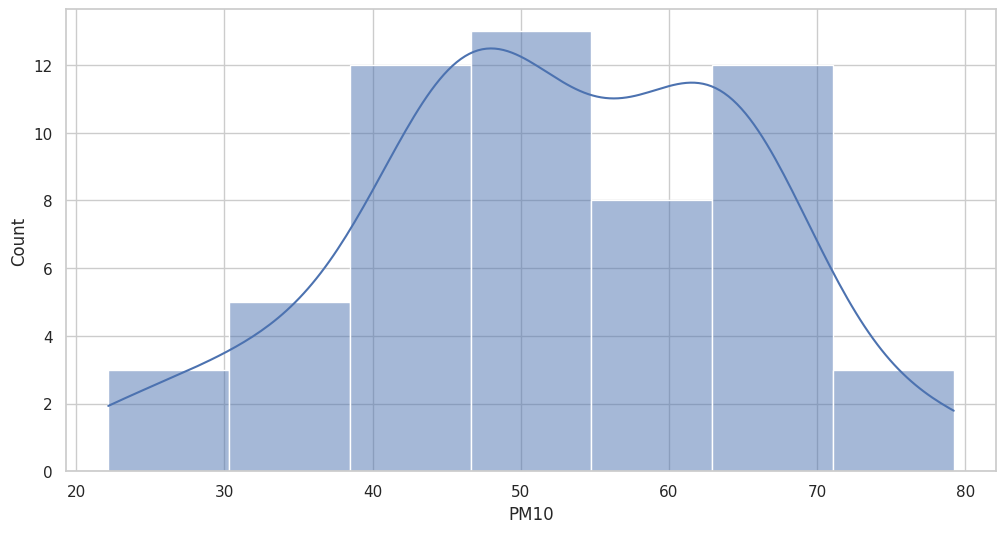

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(guangdong_province['PM10'], kde=True)

In [ ]:
# NO2 - Nitrogen Dioxide

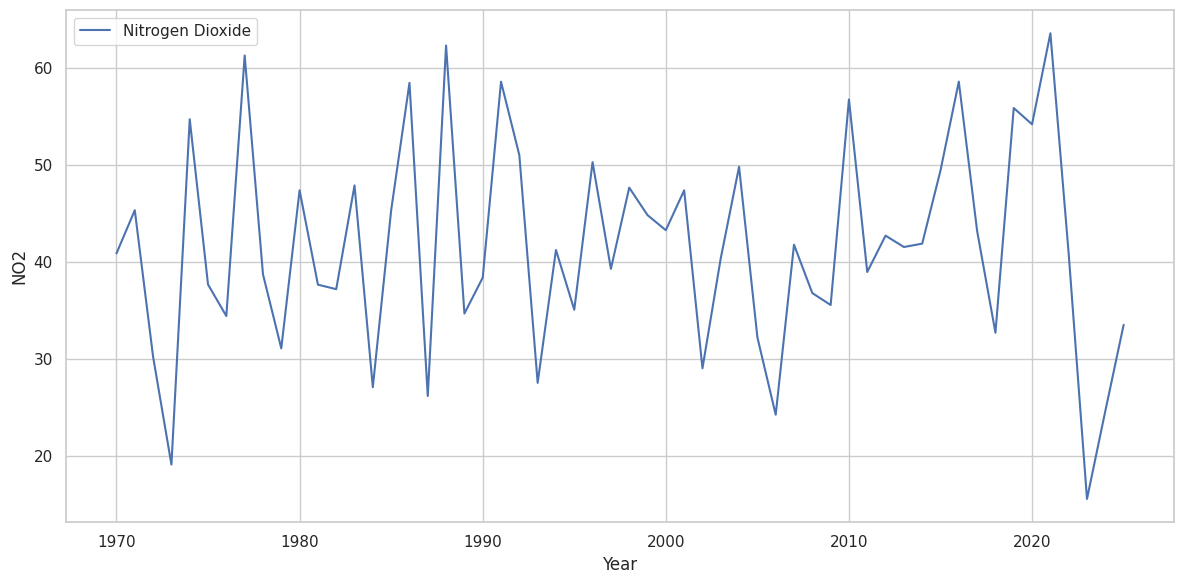

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=guangdong_province['Year'], y=guangdong_province['NO2'], label='Nitrogen Dioxide')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='NO2', ylabel='Count'>

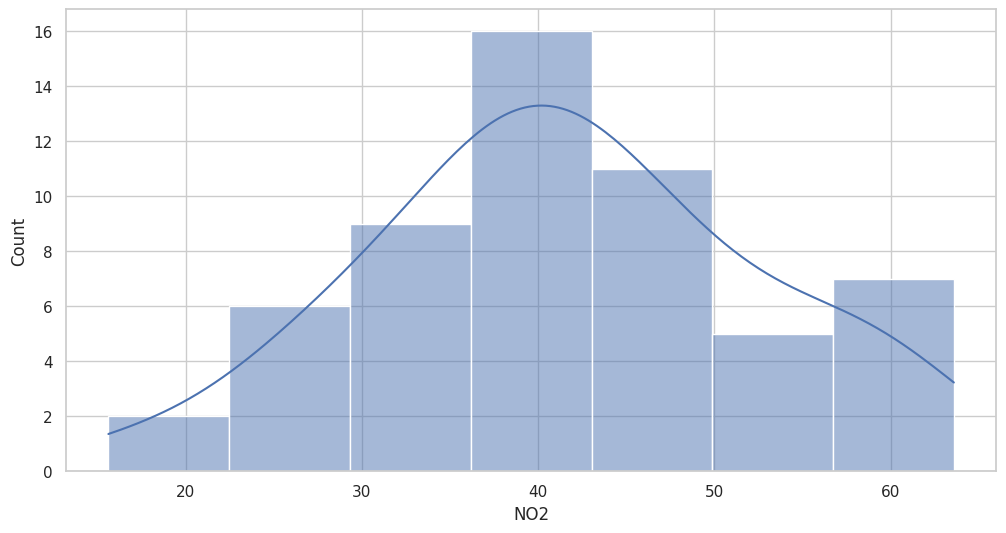

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(guangdong_province['NO2'], kde=True)

In [ ]:
# Temperature

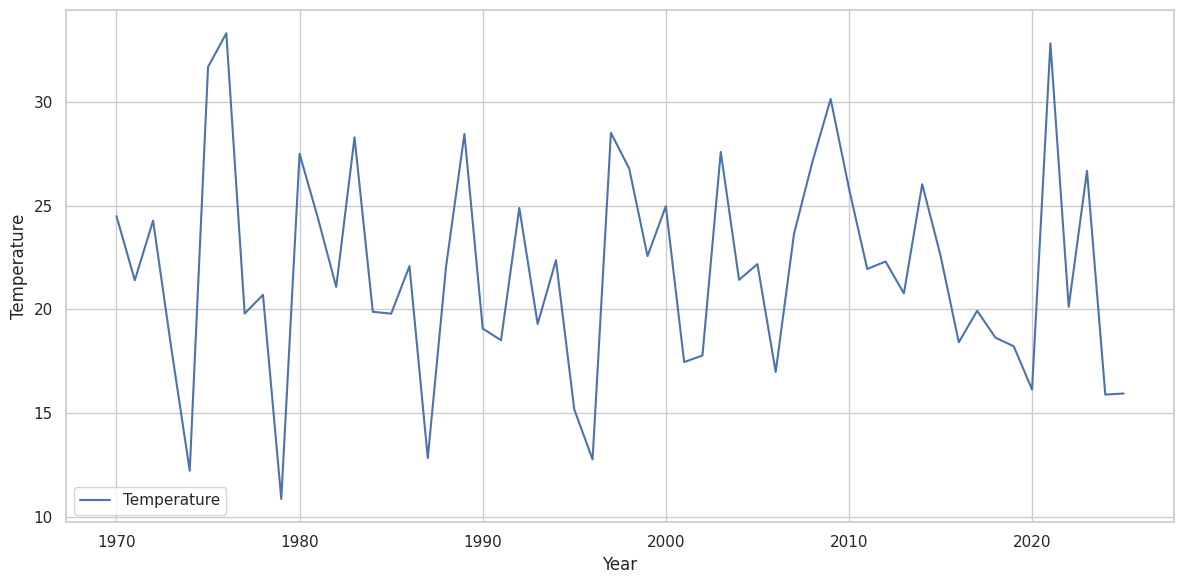

In [ ]:
#line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=guangdong_province['Year'], y=guangdong_province['Temperature'], label='Temperature')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='Temperature', ylabel='Count'>

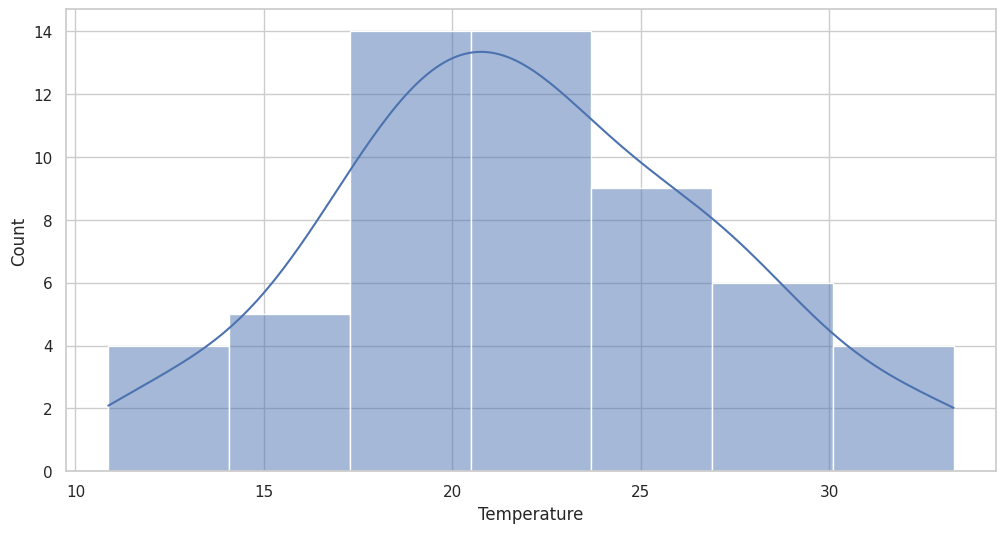

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(guangdong_province['Temperature'], kde=True)

In [ ]:
# O3 - Ozone

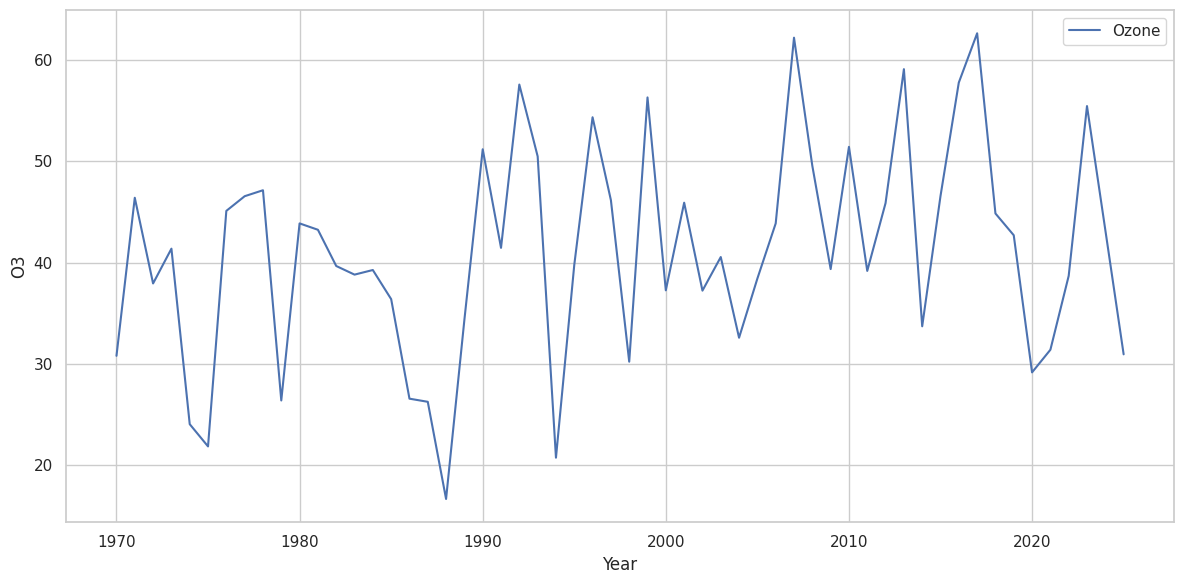

In [ ]:
# line graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.lineplot(x=guangdong_province['Year'], y=guangdong_province['O3'], label='Ozone')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


<Axes: xlabel='O3', ylabel='Count'>

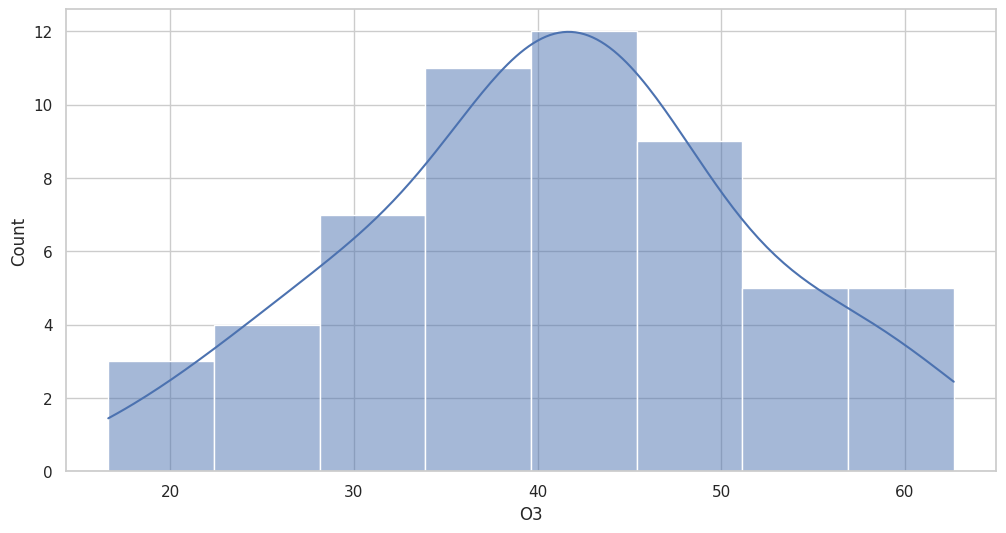

In [ ]:
# histogram graph
seaborn.set(style='whitegrid')
matplotlib.pyplot.figure(figsize=(12, 6))
seaborn.histplot(guangdong_province['O3'], kde=True)

## all pronvinces

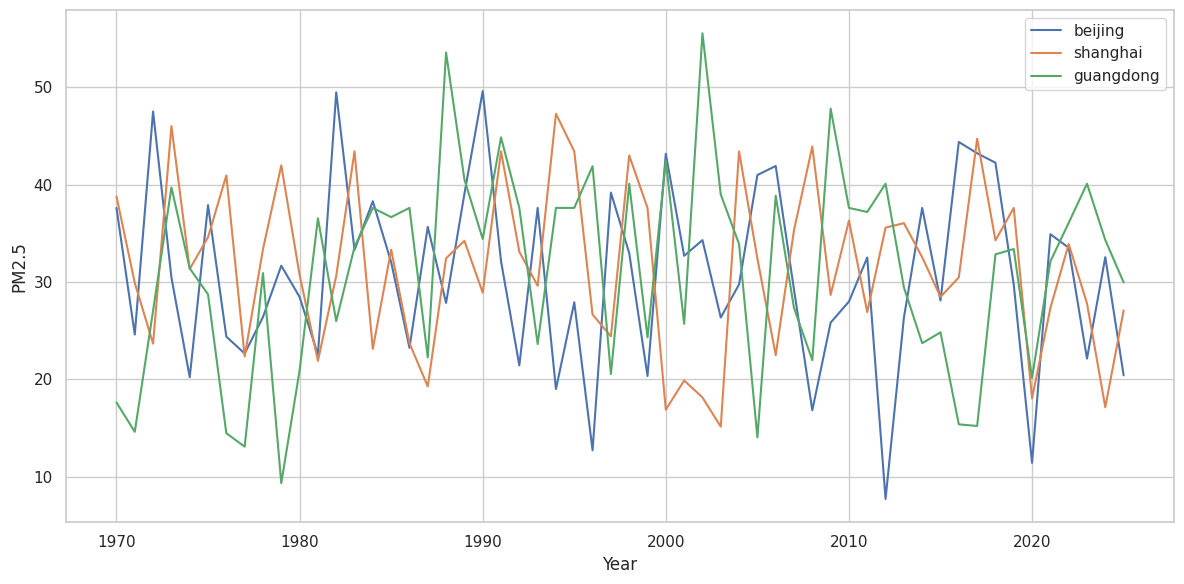

In [ ]:
matplotlib.pyplot.figure(figsize=(12, 6))

seaborn.lineplot(x=beijing_province['Year'], y=beijing_province['PM2.5'], label='beijing')
seaborn.lineplot(x=shanghai_province['Year'], y=shanghai_province['PM2.5'], label='shanghai')
seaborn.lineplot(x=guangdong_province['Year'], y=guangdong_province['PM2.5'], label='guangdong')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


In [ ]:
# concat

In [ ]:
provinces_concated=pandas.concat([beijing_province, shanghai_province, guangdong_province])


In [ ]:
# interactive chart - best chart

In [ ]:
# PM2.5 comparation
fig=plotly.express.line(provinces_concated, x='Year', y='PM2.5', color='Province', title='PM2.5')
fig.show()


In [ ]:
# PM10 comparation
fig=plotly.express.line(provinces_concated, x='Year', y='PM10', color='Province', title='PM10')
fig.show()


In [ ]:
# NO2 comparation
fig=plotly.express.line(provinces_concated, x='Year', y='NO2', color='Province', title='Nitrogen Dioxide')
fig.show()


In [ ]:
# Temperatures comparation
fig=plotly.express.line(provinces_concated, x='Year', y='Temperature', color='Province', title='Temperatures')
fig.show()


In [ ]:
# O3 comparation
fig=plotly.express.line(provinces_concated, x='Year', y='O3', color='Province', title='Ozone')
fig.show()


# insights